# Second Hand Car Price Prediction

# Objective:
 The objective of the "Second-hand Car Price Prediction" project is to develop a machine learning model capable of accurately predicting the price of second-hand cars based on various features and specifications of the vehicles.
 

# Description of the columns:-

- **Car_ID:** A unique identifier for each car listing.
- **Name:** The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.) with model of the cars  (e.g., Camry, Civic, Mustang, etc.).
- **Year:** The manufacturing year of the car.
- **Kilometers_Driven:** The total kilometers driven by the car.
- **Fuel_Type:** The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).
- **Transmission:** The transmission type of the car (e.g., Manual, Automatic).
- **Owner_Type:** The number of previous owners of the car (e.g., First, Second, Third).
- **Mileage:** The fuel efficiency of the car in kilometers per liter.
- **Engine:** The engine capacity of the car in CC (Cubic Centimeters).
- **Power:** The maximum power output of the car in bhp (Brake Horsepower).
- **Seats:** The number of seats available in the car.
- **Price:** The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

# 1- Importing the necessary Libreries and loading the Data

In [302]:
import warnings
warnings.filterwarnings("ignore")

# Data manipulation and numerical operations
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt   # For plotting and visualizations
from matplotlib.cm import get_cmap # For model plotting for comparision
import seaborn as sns   # For visualizations
%matplotlib inline

# Categorical Feature encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# Scikit-learn: Preprocessing
from sklearn.preprocessing import MinMaxScaler      # for Normalizing the data
from sklearn.preprocessing import StandardScaler    # for Standardizing the data

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC
from sklearn.model_selection import cross_val_score   # For evaluating model performance
from sklearn.model_selection import learning_curve

# Scikit-learn: Machine learning model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # for hyperparameter tuning

In [3]:
df=pd.read_csv("train-data.csv")
df.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [5]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print("\nColumn Details:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (6019, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB

Column Details:
 None

Missing Val

In [7]:
name=df['Name'].str.split(n=3, expand=True)
df['Brand']=name[0]
df.drop(['Unnamed: 0','New_Price','Name'], axis=1, inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(5975, 12)

In [11]:
print(f'unique values in fuel_type is {df.Fuel_Type.nunique()}')
print(f'unique values in transmission is {df.Transmission.nunique()}')
print(f'unique values in owner_type is {df.Owner_Type.nunique()}')
print(f'unique values in brand is {df.Brand.nunique()}')
print(f'unique values in location is {df.Location.nunique()}')

unique values in fuel_type is 4
unique values in transmission is 2
unique values in owner_type is 4
unique values in brand is 31
unique values in location is 11


In [13]:
# Looking ate the unique values of Categorical Features
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())
print(df['Brand'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [17]:
df['Mileage'] = df['Mileage'].astype(str).str.replace('km/kg', '', regex=False)
df['Mileage'] = df['Mileage'].str.replace('kmpl', '', regex=False)
df['Engine'] = df['Engine'].astype(str).str.replace('CC', '', regex=False)
df['Power'] = df['Power'].astype(str).str.replace('bhp', '', regex=False)

# Converting Columns to Numeric: 
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [19]:
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
Brand                  0
dtype: int64

In [21]:
df['Power'].fillna(df['Power'].mean(), inplace=True)

# 2- Data Exploration

### 2.1- Descriptive Statistics

In [24]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.276894,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,53.415373,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [26]:
num_feature= df[['Kilometers_Driven','Mileage','Engine','Power','Seats']]
skew = num_feature.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
skew

Kilometers_Driven    58.598903
Mileage              -0.350760
Engine                1.425444
Power                 1.932930
Seats                 1.835262
dtype: float64

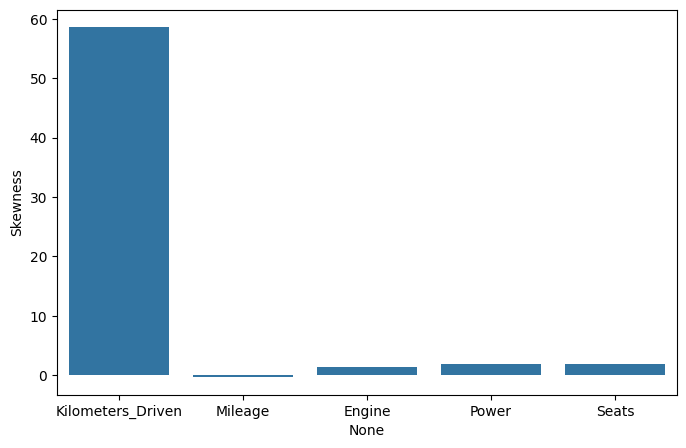

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
plt.show()

#### 1- Highly Skewed Feature:
- Kilometers_Driven has the extreme skewness
#### 2-  Moderate Skewness:
- Features like Engine (1.42), Power (1.93) and Seats (1.83) have lower skewness, indicating a more balanced distribution.

### 2.2- Bivariate and Multivariate Analysis of the Columns

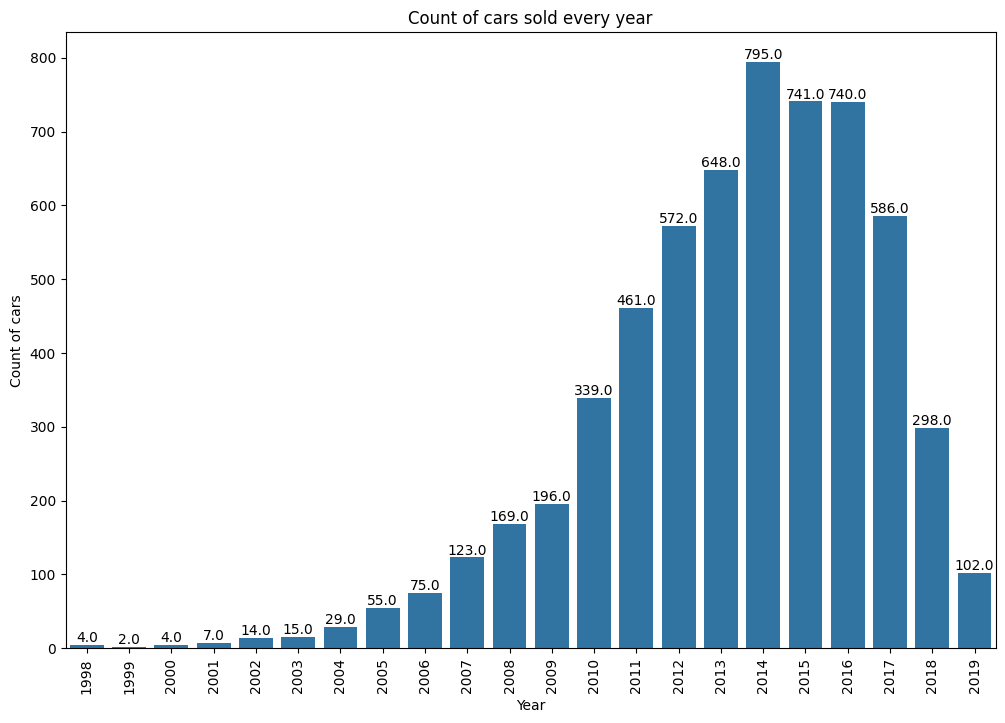

In [31]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Year', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars sold every year")
plt.xlabel("Year")
plt.ylabel("Count of cars")
plt.show()

- **Growth Phase (1998–2014):** Indicates a growing market for second-hand cars during this period, likely due to economic growth or increased availability of used cars.
- **Decline Phase (2015–2019):** reflects market saturation, economic downturn, or a shift in consumer preferences (e.g., moving towards new cars or alternative modes of transportation).

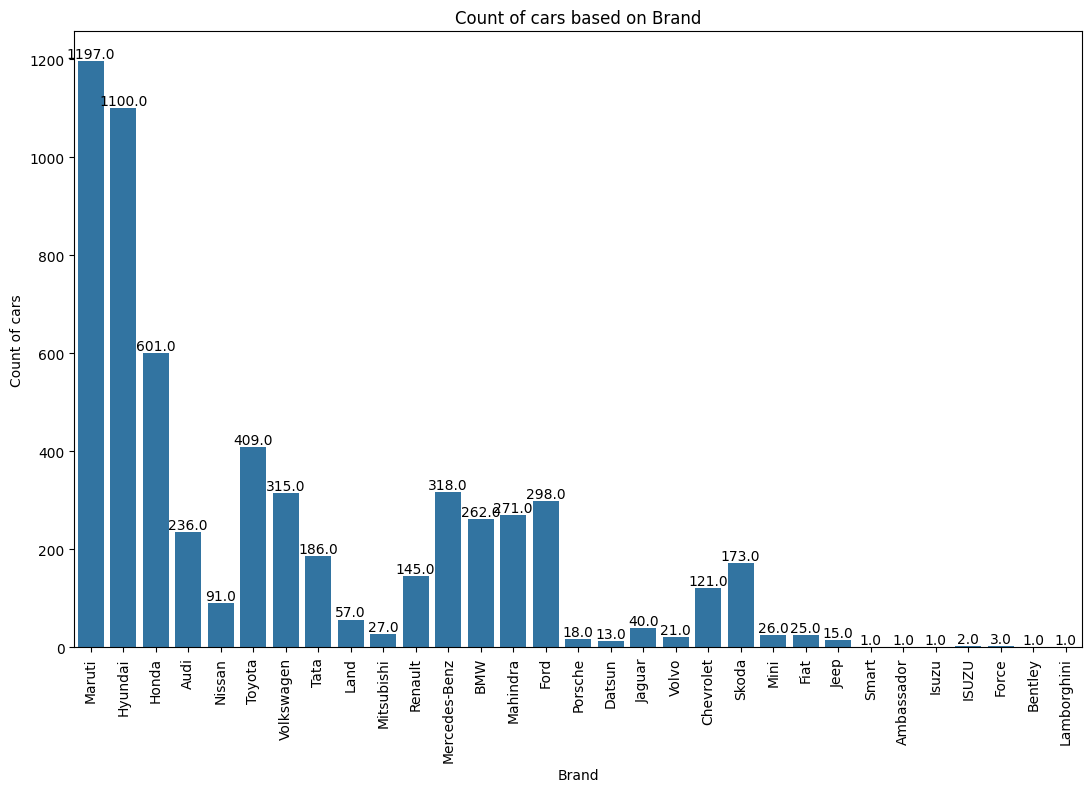

In [33]:
plt.figure(figsize = (13, 8))
plot = sns.countplot(x = 'Brand', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brand")
plt.xlabel("Brand")
plt.ylabel("Count of cars")
plt.show()

### Dominant Brands:
- Maruti leads with the highest sales count of 1197 cars, followed by Hyundai with 1100 cars.
- Honda is a distant third with 601 cars sold.
### Low-Selling Brands:
- Niche and luxury brands like Lamborghini (1), Bentley (1), Force (1), and others (e.g., Mini, Smart, Fiat) have very low sales figures.

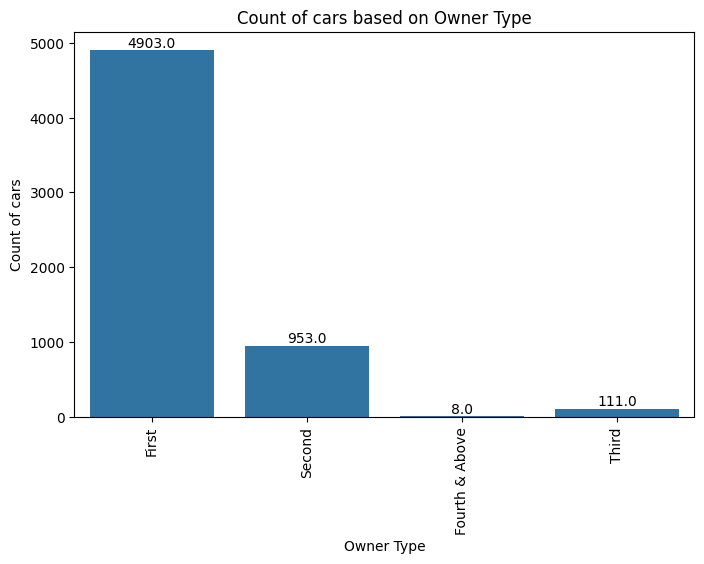

In [35]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Owner_Type', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count of cars")
plt.show()

- **The Highest selling second hand cars are from the First person.**

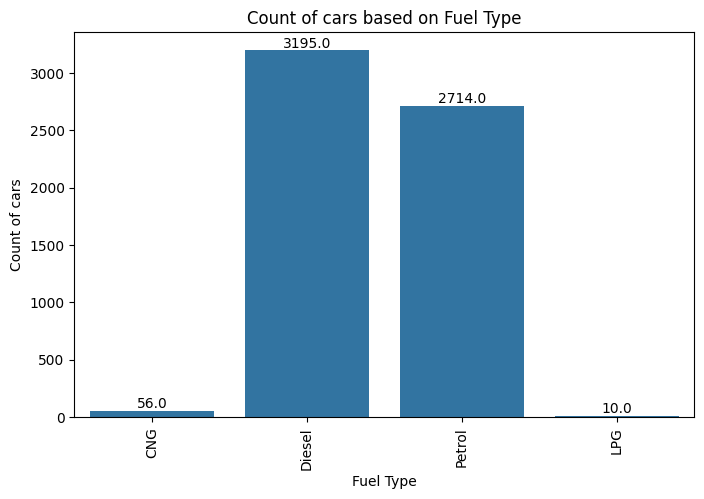

In [37]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Fuel_Type', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count of cars")
plt.show()

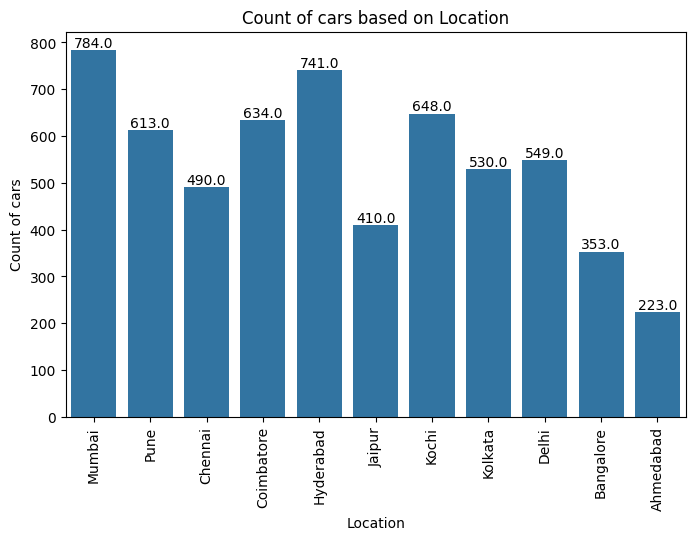

In [39]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Location', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Location")
plt.xlabel("Location")
plt.ylabel("Count of cars")
plt.show()

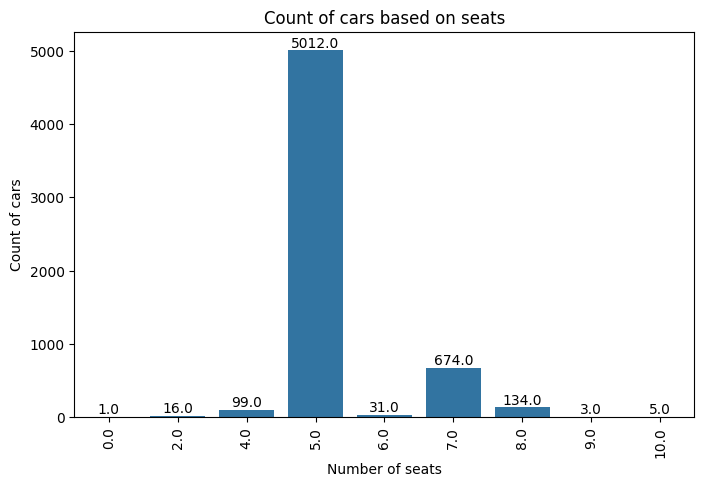

In [41]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Seats', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on seats")
plt.xlabel("Number of seats")
plt.ylabel("Count of cars")
plt.show()

- **The Maximum second hand cars have 5 seats.**

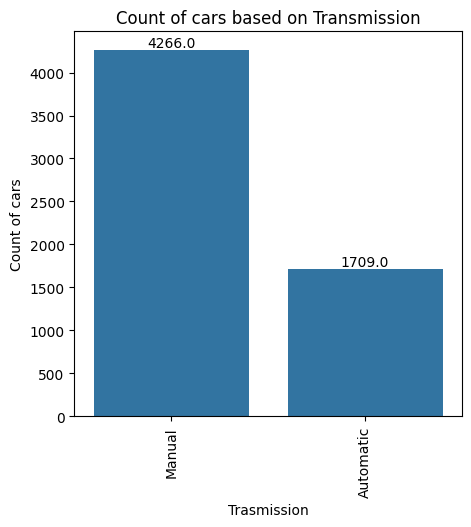

In [43]:
plt.figure(figsize = (5, 5))
plot = sns.countplot(x = 'Transmission', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Transmission")
plt.xlabel("Trasmission")
plt.ylabel("Count of cars")
plt.show()

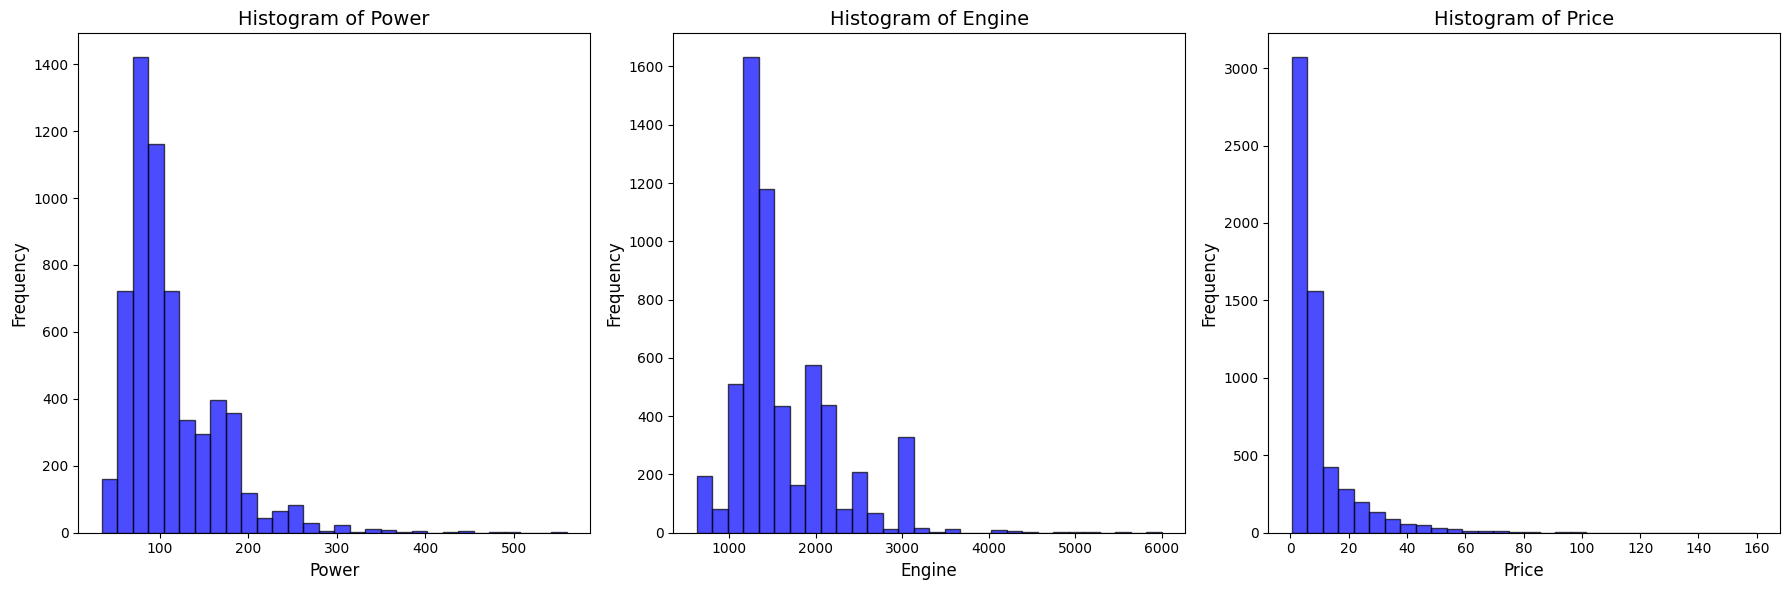

In [45]:
# Plotting histograms of multiple columns together
# Defining the columns to plot and the figure size
columns_to_plot = ['Power', 'Engine', 'Price']
num_columns = len(columns_to_plot)

# Creating subplots
fig, axes = plt.subplots(1, num_columns, figsize=(18, 6), sharey=False)

# Plot histograms for each selected column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

- The variables **Power, Engine, and Price** show the right-skewed distributions, suggesting that the most observations are clustered at lower values with a long tail of higher values.
- These patterns may indicate the potential outliers in the data or a need for transformations (e.g., logarithmic scaling) for machine learning models to achieve better results.

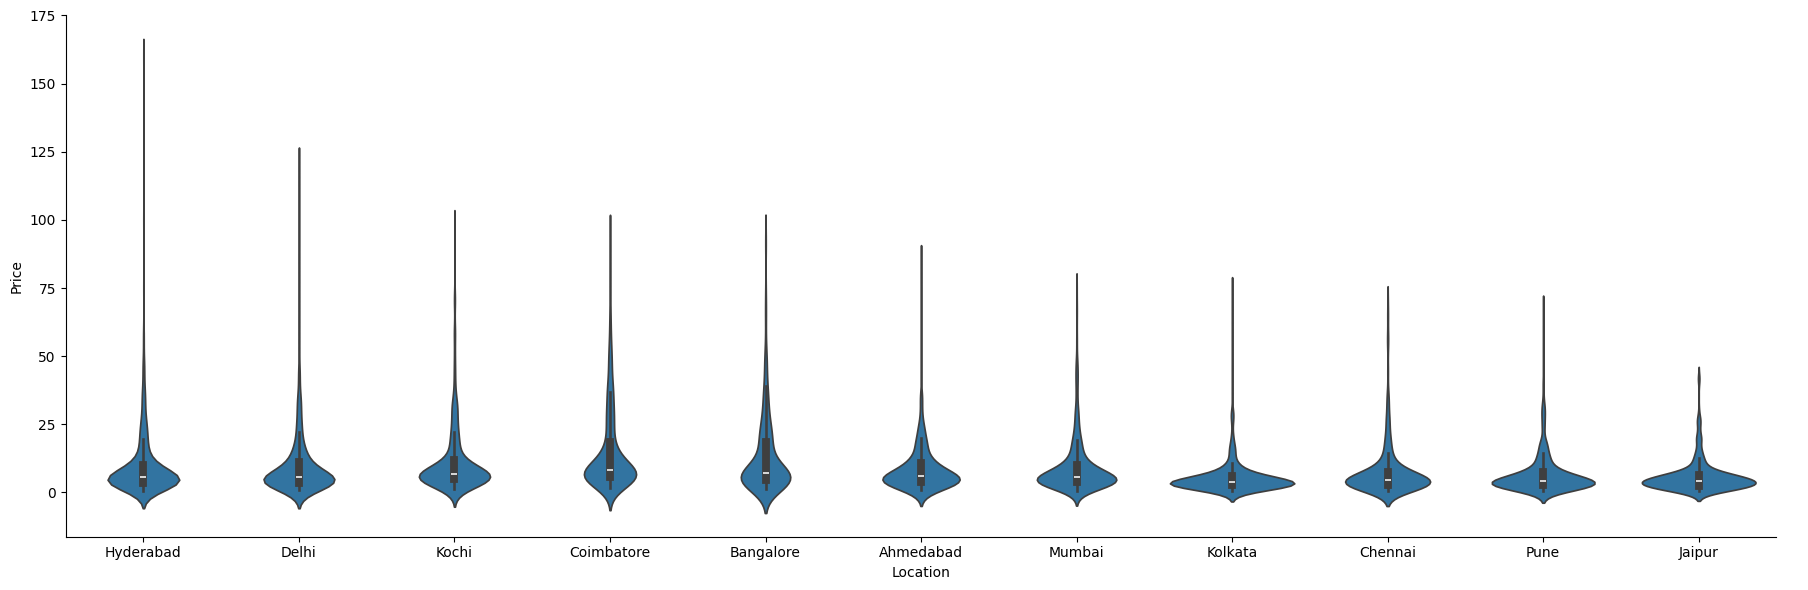

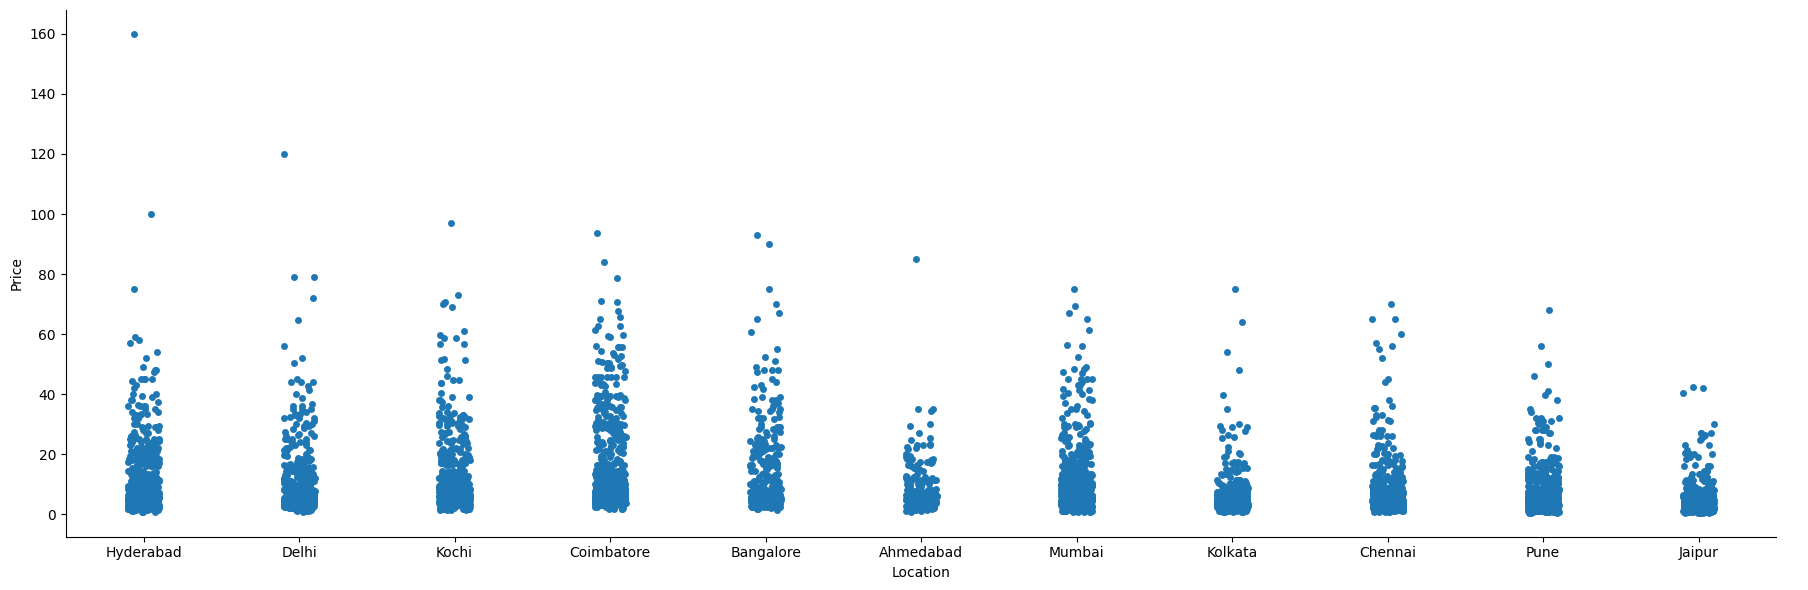

In [47]:
# Plotting the Location vs Price
sns.catplot(y='Price',x='Location',data= df.sort_values('Price',ascending=False),kind="violin",height=6, aspect=3)
sns.catplot(y='Price',x='Location',data= df.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show()

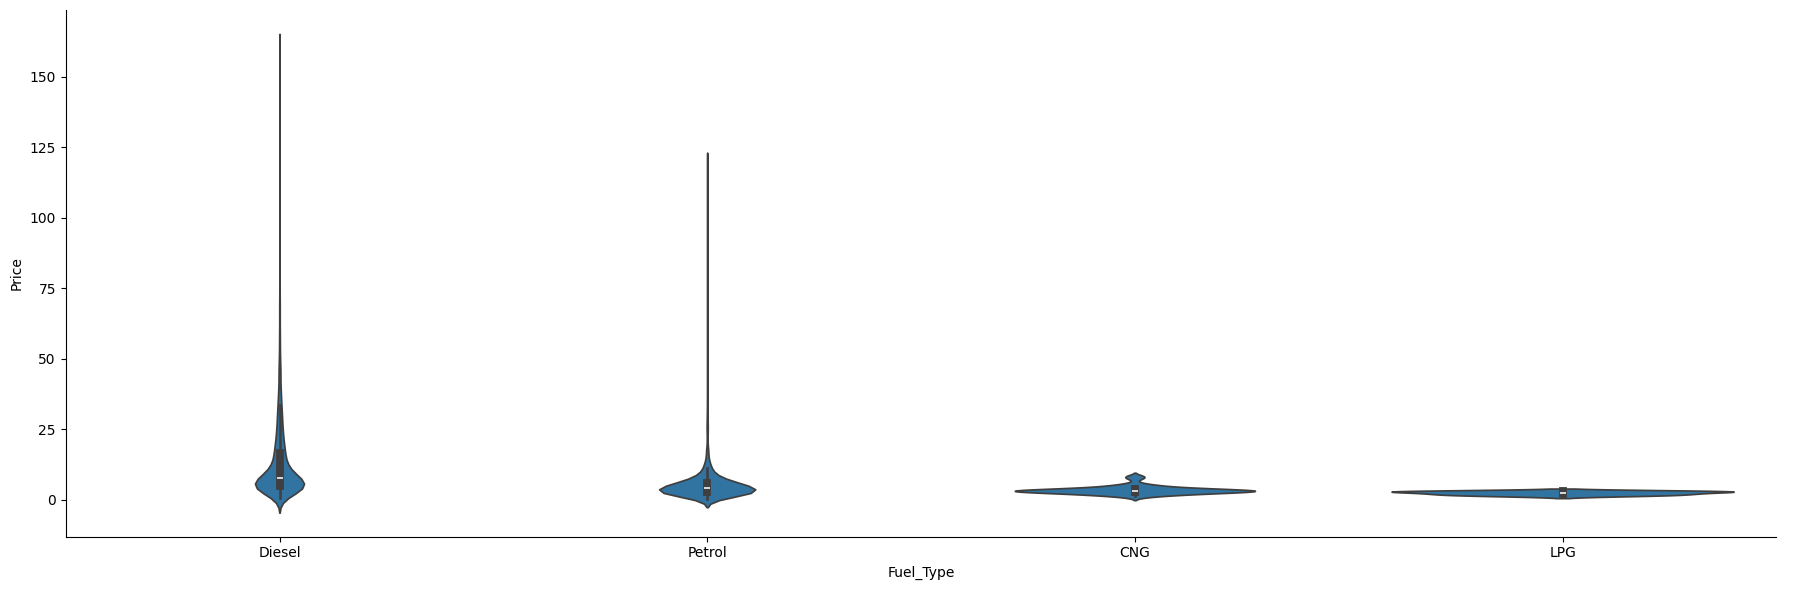

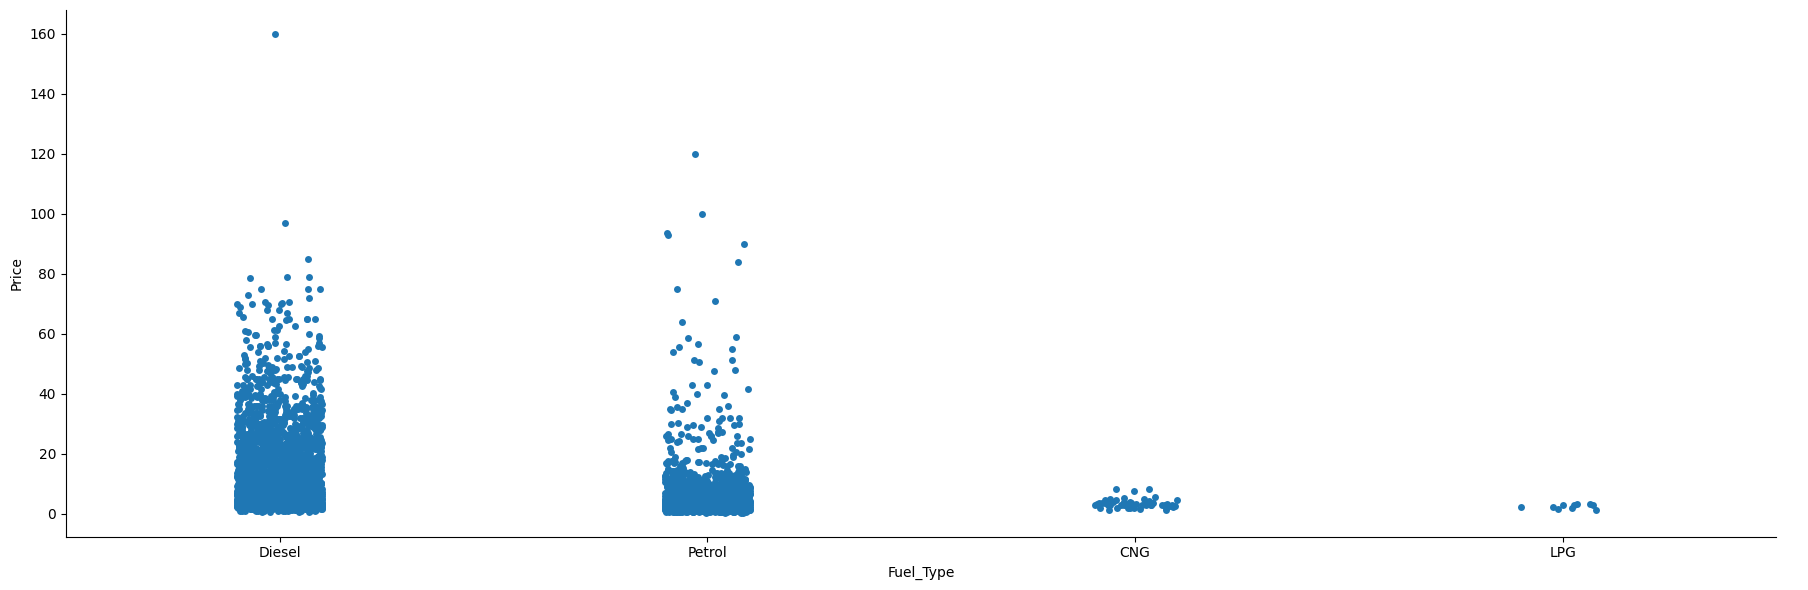

In [49]:
# Plotting the Feul_Type vs Price
sns.catplot(y='Price',x='Fuel_Type',data= df.sort_values('Price',ascending=False),kind="violin",height=6, aspect=3)
sns.catplot(y='Price',x='Fuel_Type',data= df.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show()

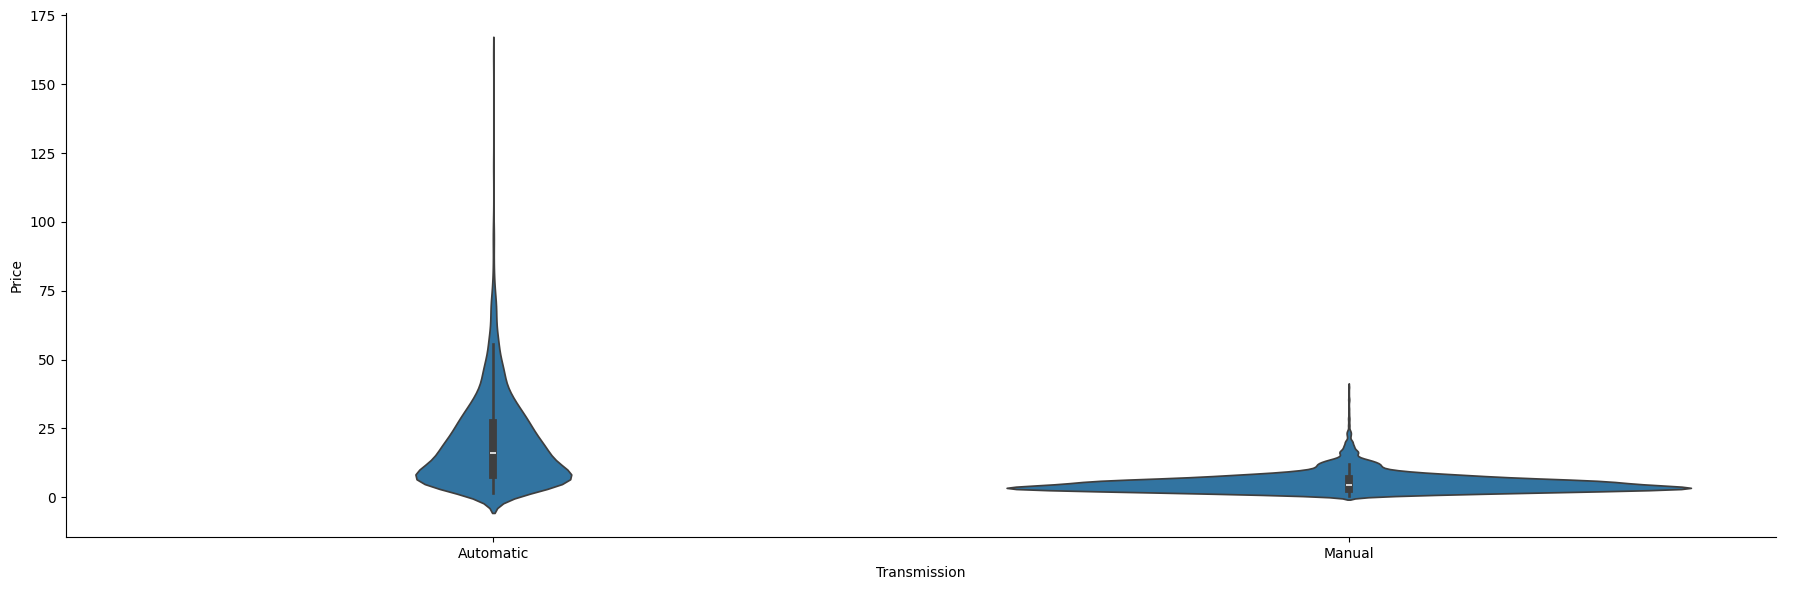

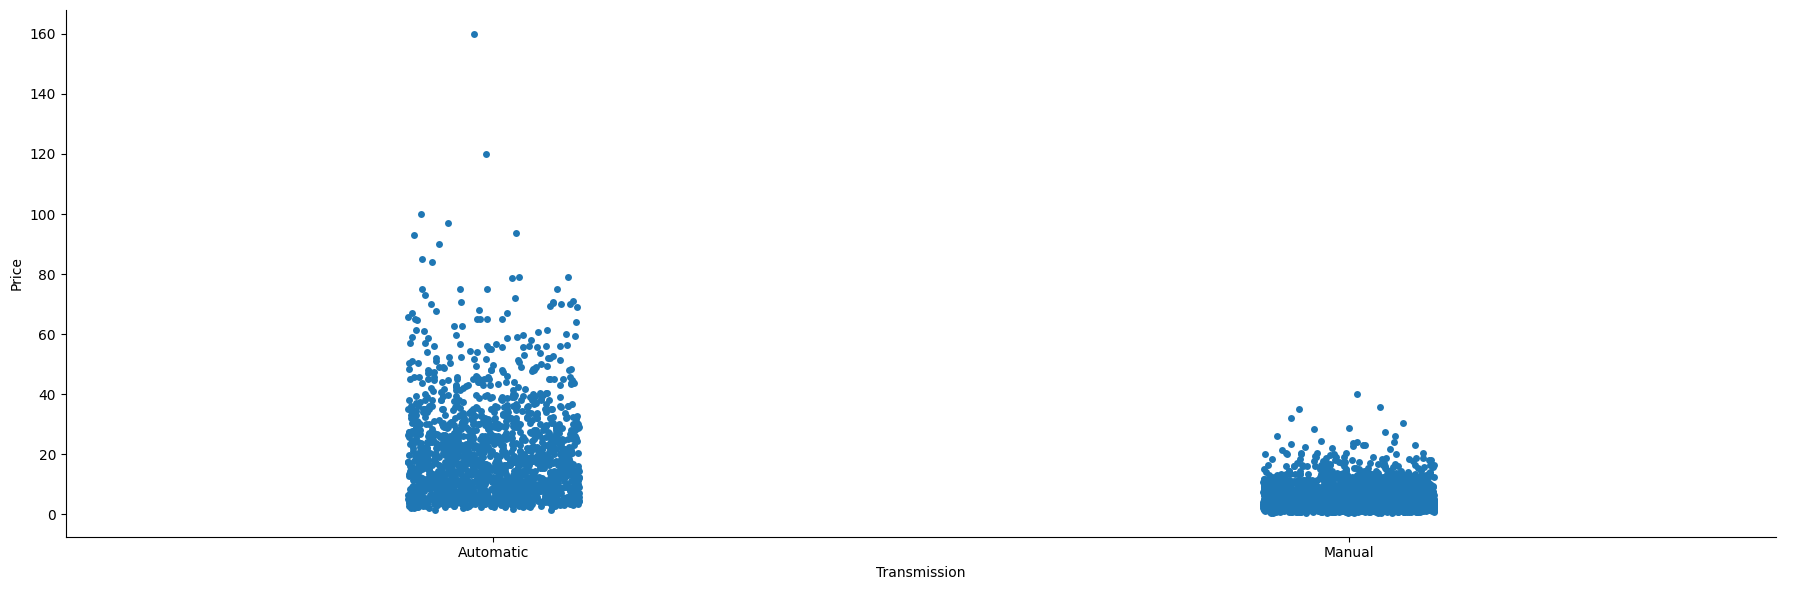

In [51]:
# Plotting the Location vs Price
sns.catplot(y='Price',x='Transmission',data= df.sort_values('Price',ascending=False),kind="violin",height=6, aspect=3)
sns.catplot(y='Price',x='Transmission',data= df.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show()

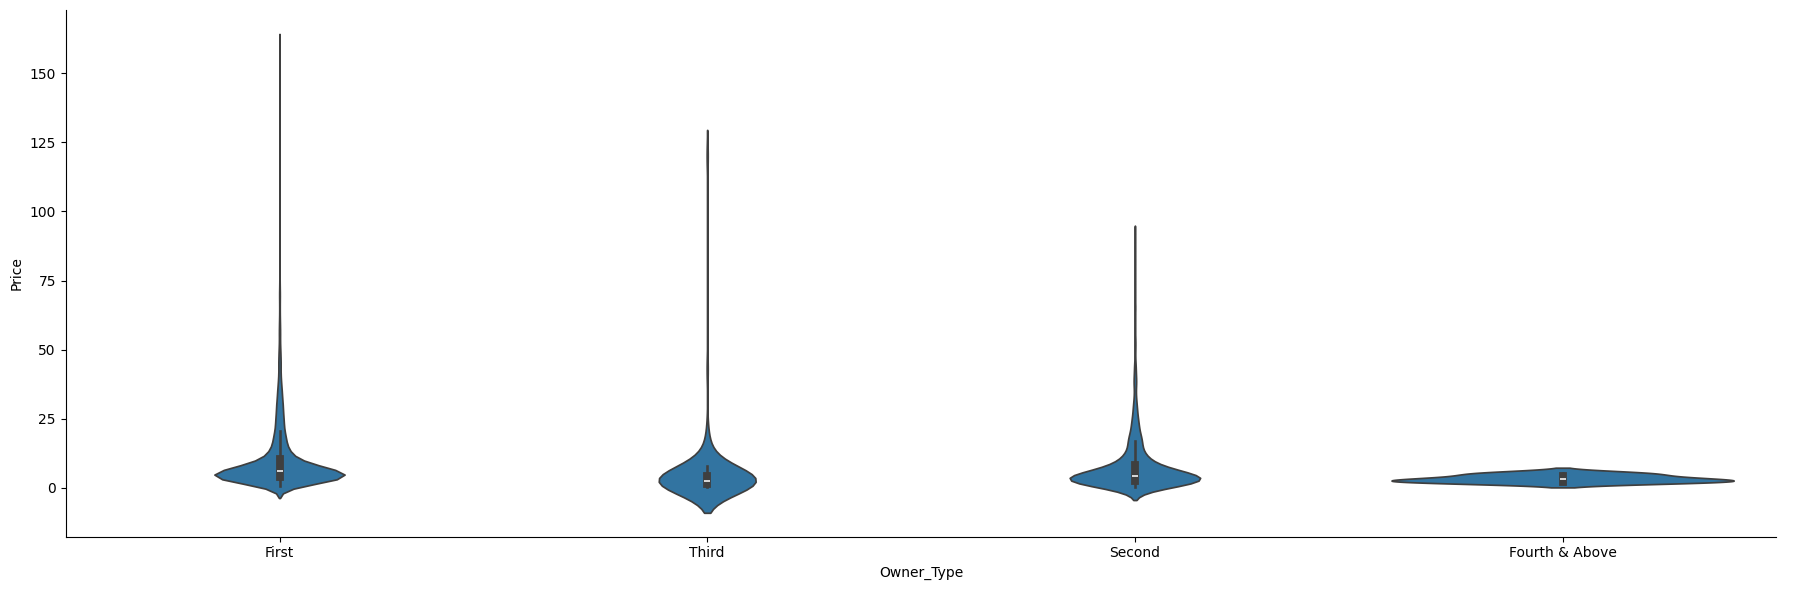

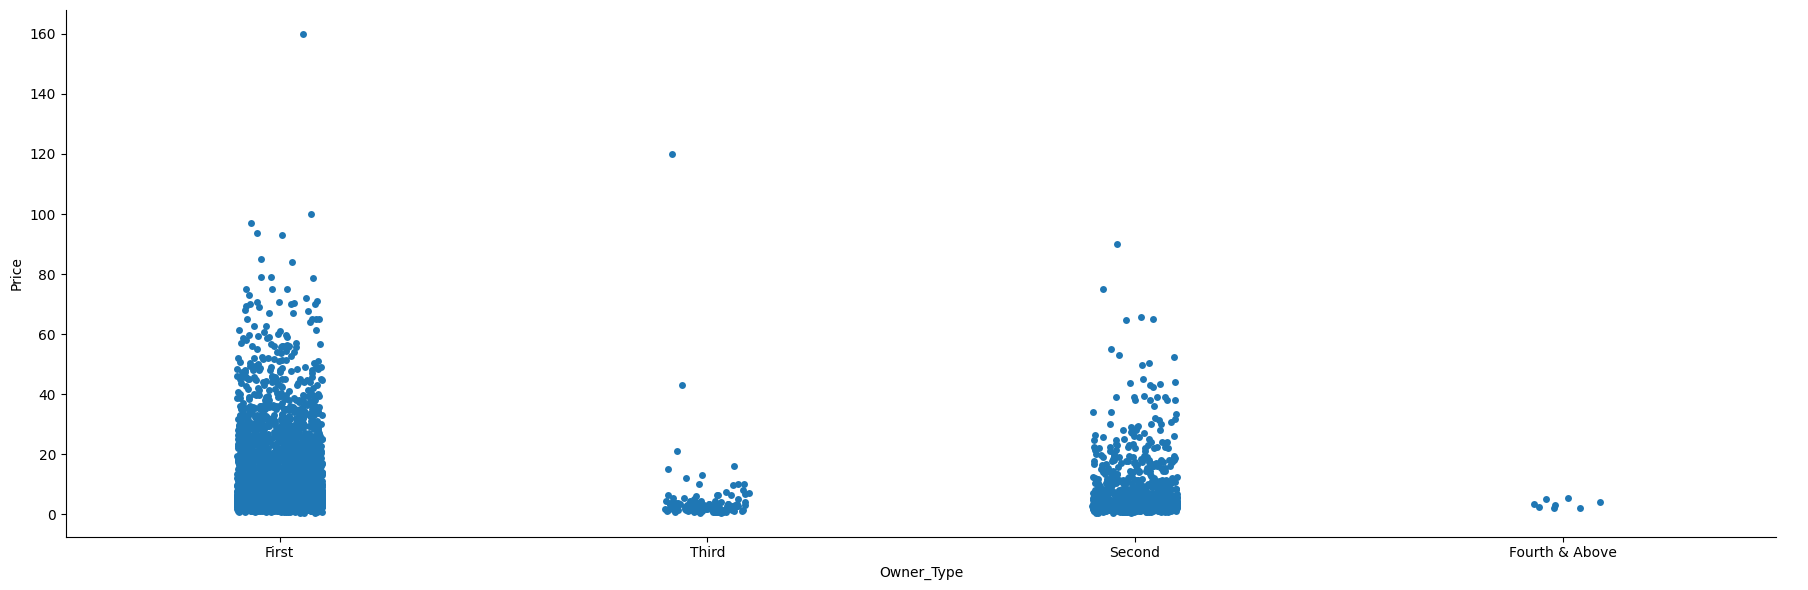

In [53]:
# Plotting the Location vs Price
sns.catplot(y='Price',x='Owner_Type',data= df.sort_values('Price',ascending=False),kind="violin",height=6, aspect=3)
sns.catplot(y='Price',x='Owner_Type',data= df.sort_values('Price',ascending=False),kind="strip",height=6, aspect=3)
plt.show()

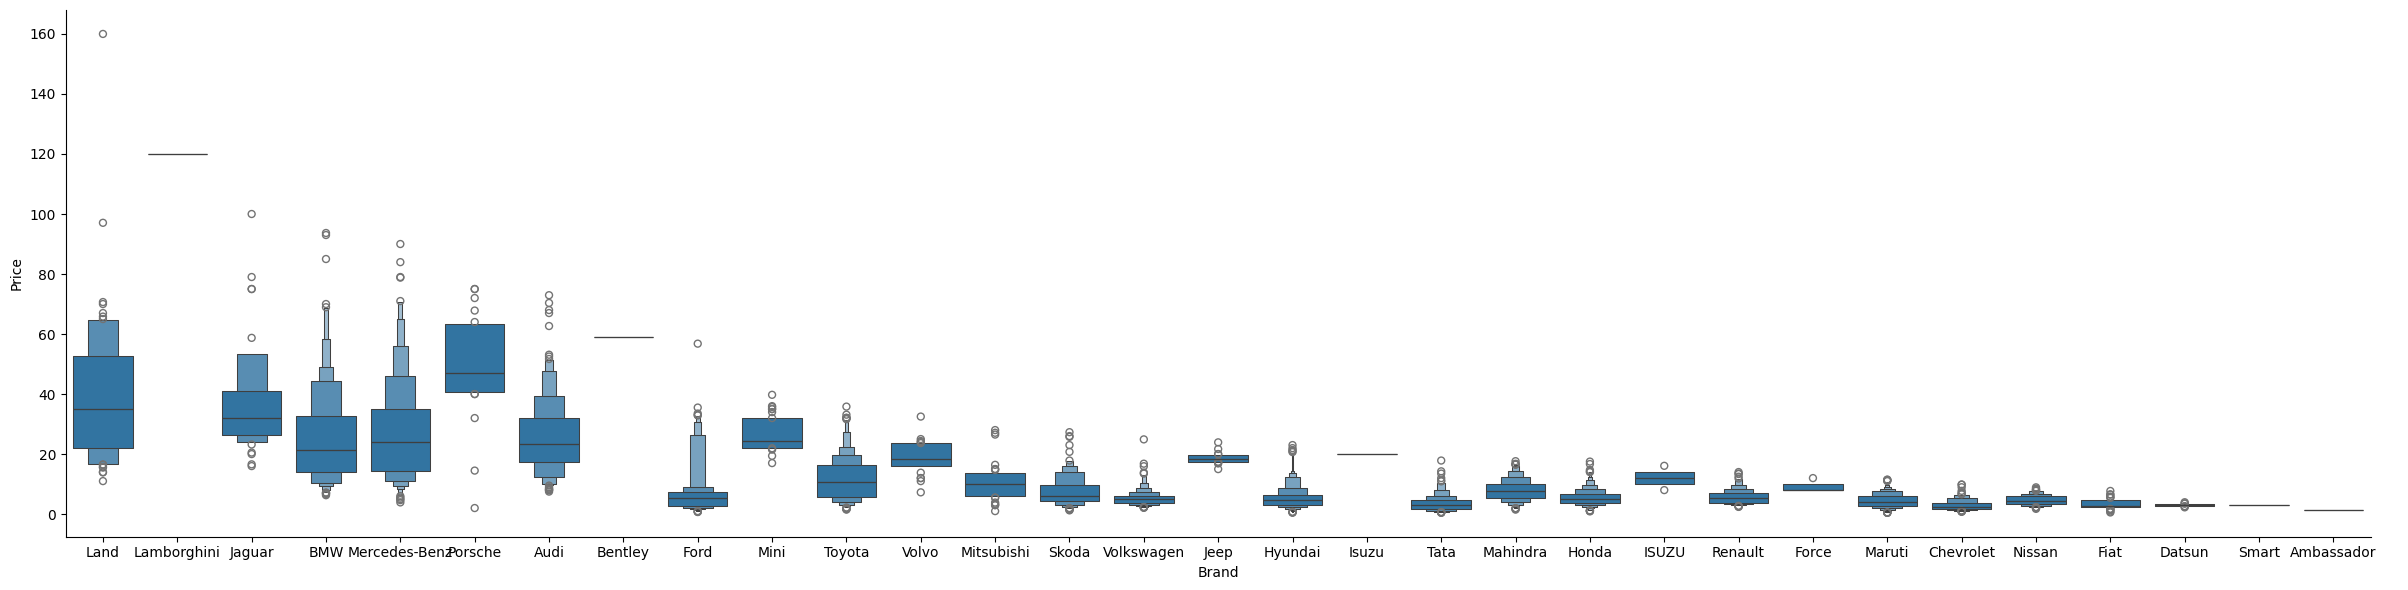

In [55]:
# Plotting the Location vs Price
sns.catplot(y='Price',x='Brand',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=4)
plt.show()

#### Luxury Brands:
- **Lamborghini:** has a high median price, with no apparent variability in its range, indicating a consistent price level for its offerings.
- **Land Rover and Jaguar:** Show a higher median price with a broader range, reflecting variability in their pricing (likely due to a mix of models).
- **BMW and Mercedes-Benz:** Display moderate price ranges, with several outliers representing their high-end models.

#### Mid-Range Brands:
- **Toyota, Volkswagen, and Skoda:** show moderate price ranges with a few outliers for expensive models.These brands cater to both budget-conscious and premium customers.

#### Budget Brands:
- **Maruti, Hyundai, Tata, Renault, and Nissan:** have relatively lower price ranges, with fewer outliers.These brands are typically focused on affordability and mass-market appeal.

#### Outliers:
-Outliers appear as individual dots outside the whiskers of the box plots.These represent cars priced significantly higher or lower than the typical range for that brand.

#### Brands with Narrow Variability:
-Brands like Smart, Ambassador, Datsun, and Fiat have minimal price range variability, suggesting fewer models or more consistent pricing strategies.

**We have to do One Hot Encoding for 'Brand', 'Transmission', 'Fuel_Type' and Label Encoding for 'Owner_Type'**

# 3- Dealing with Features (categorical and continuous) and Features selection

### 3.1- Encoding the ordered categorical feature

In [60]:
# Looking ate the unique values of Categorical Features
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())
print(df['Brand'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [62]:
ordinal_map = {'First':1, 'Second':2, 'Third':3, 'Fourth & Avove':4}
df['Owner_Type']=df['Owner_Type'].map(ordinal_map)
df.dropna(inplace=True)

In [64]:
# Converting 'Owner_Type' and 'Seats' to integer type
df['Owner_Type'] = df['Owner_Type'].astype(int)
df['Seats'] = df['Seats'].astype(int)

### 3.2- Adjusting the Outliers

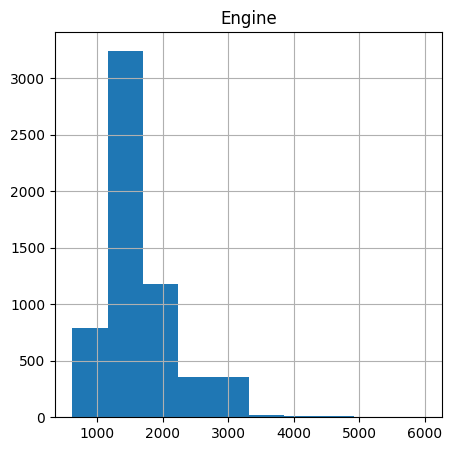

In [67]:
df.hist(['Engine'], figsize=(5,5))
plt.show()

In [69]:
# Counting the number of rows having outliers
len(df['Engine'][df['Engine']>3000])

61

In [71]:
# Finding logical value near 3000
df['Engine'][df['Engine']<=3000].sort_values(ascending=False)

2900    2999
3220    2997
4272    2997
2095    2996
418     2996
        ... 
4561     624
761      624
740      624
523      624
5474     624
Name: Engine, Length: 5906, dtype: int64

In [73]:
df['Engine'][df['Engine']>3000]=2999

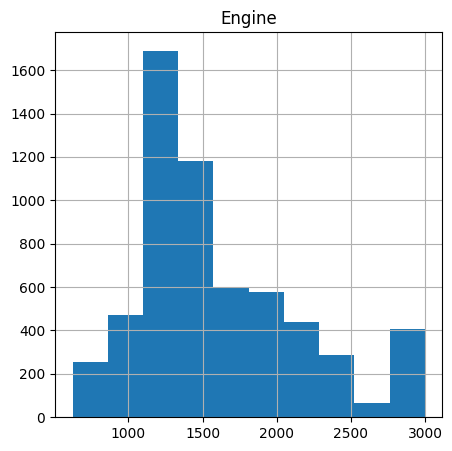

In [75]:
df.hist(['Engine'], figsize=(5,5))
plt.show()

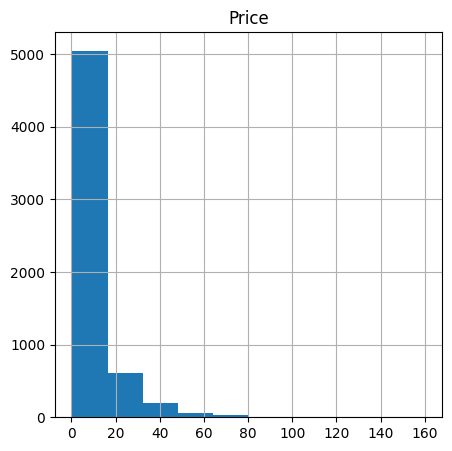

In [77]:
df.hist(['Price'], figsize=(5,5))
plt.show()

In [79]:
# Counting the number of rows having outliers
len(df['Price'][df['Price']>70])

23

In [81]:
top_10_prices = df.sort_values(by="Price", ascending=False).head(30)

print("Top 10 highest prices:")
print(top_10_prices)


Top 10 highest prices:
        Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
4079   Hyderabad  2017              25000    Diesel    Automatic           1   
5781       Delhi  2011               6500    Petrol    Automatic           3   
5919   Hyderabad  2015               8000    Petrol    Automatic           1   
1505       Kochi  2019              26013    Diesel    Automatic           1   
1974  Coimbatore  2018              28060    Petrol    Automatic           1   
1984   Bangalore  2017              17465    Petrol    Automatic           1   
4691   Bangalore  2014               3000    Petrol    Automatic           2   
5535   Ahmedabad  2015              97003    Diesel    Automatic           1   
2095  Coimbatore  2019               2526    Petrol    Automatic           1   
1885       Delhi  2018               6000    Diesel    Automatic           1   
2422       Delhi  2016              12000    Diesel    Automatic           1   
2319  Coimbatore 

In [83]:
df['Price'][df['Price']>70]=70

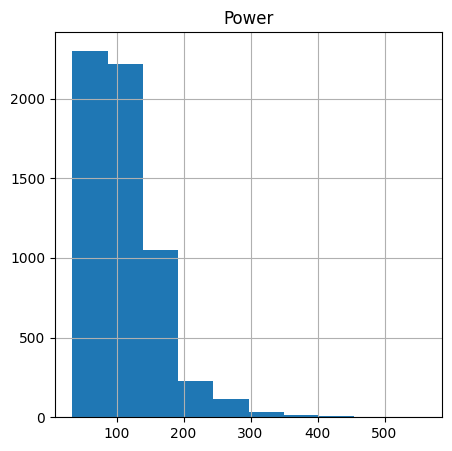

In [85]:
df.hist(['Power'], figsize=(5,5))
plt.show()

In [87]:
# Counting the number of rows having outliers
len(df['Power'][df['Power']>400])

12

In [89]:
top_10_prices = df.sort_values(by="Power", ascending=False).head(50)

print("Top 10 highest prices:")
print(top_10_prices)

Top 10 highest prices:
        Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
5781       Delhi  2011               6500    Petrol    Automatic           3   
5521   Hyderabad  2006              48000    Petrol    Automatic           1   
2100      Mumbai  2010              35000    Petrol    Automatic           2   
5088  Coimbatore  2011              43686    Petrol    Automatic           1   
70        Mumbai  2008              73000    Petrol    Automatic           1   
5919   Hyderabad  2015               8000    Petrol    Automatic           1   
4627       Kochi  2010              65329    Petrol    Automatic           1   
4821      Mumbai  2011               5900    Petrol    Automatic           1   
4061      Mumbai  2013              23312    Petrol    Automatic           1   
148       Mumbai  2013              23000    Petrol    Automatic           1   
4691   Bangalore  2014               3000    Petrol    Automatic           2   
3341       Kochi 

In [91]:
df['Power'][df['Power']>400]=400

### 3.3- Features Selection by Using ANOVA
The Analysis of Variance (ANOVA) test is a statistical method used to evaluate whether there are significant differences between the means of two or more groups. 
##### NULL HYPOTHISIS: 
- There is no relationship between the variables, meaning the average (mean) values of the continuous target variable are the same across all groups of the categorical predictor variable.
##### ALTERNATIVE HYPOTHISIS:
- There is a significant reletionship between variables.

A low p-value (typically < 0.05) indicates that the means of the groups are significantly different.

In [94]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.1):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [96]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand']
FunctionAnova(inpData=df, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Location is correlated with Price | P-Value: 3.6648321765805035e-81
Year is correlated with Price | P-Value: 3.5201110456408105e-125
Kilometers_Driven is correlated with Price | P-Value: 9.51499168434207e-15
Fuel_Type is correlated with Price | P-Value: 4.170864728751612e-152
Transmission is correlated with Price | P-Value: 0.0
Owner_Type is correlated with Price | P-Value: 4.8867976695341296e-14
Mileage is correlated with Price | P-Value: 0.0
Engine is correlated with Price | P-Value: 0.0
Power is correlated with Price | P-Value: 0.0
Seats is correlated with Price | P-Value: 1.6134551586715169e-114
Brand is correlated with Price | P-Value: 0.0


['Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Brand']

So every columns have the significant reletionship with target column.

### 3.4- Converting the nominal variable to numeric using get_dummies()

In [100]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998,58.16,5,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5,17.74,Audi


In [102]:
# Treating all the nominal variables at once using dummy variables
df=pd.get_dummies(df, dtype=int, drop_first=True)
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,1,26.60,998,58.16,5,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,1,19.67,1582,126.20,5,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,1,18.20,1199,88.70,5,4.50,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,1,20.77,1248,88.76,7,6.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,2,15.20,1968,140.80,5,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
import datetime
curr_time = datetime.datetime.now()
df['Year'] = df['Year'].apply(lambda x : curr_time.year - x)

# 4- Splitting and Scaling the Data for the Models

In [107]:
# Separate Target Variable and Predictor Variables
TargetVariable=df['Price']
Predictors= df.drop('Price',axis='columns')


# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Predictors, TargetVariable, test_size=0.2, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4773, 51)
(4773,)
(1194, 51)
(1194,)


In [173]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5- Model Building

### 5.1- Multiple Linear Regression

In [177]:
# Initializing and training the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test_scaled)


In [179]:
# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 26.633635725110917
Mean Absolute Error (MAE): 3.0017126693345344
R-squared (R2): 0.7827789241056045


In [181]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=10, scoring='r2')
print("10-Fold Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))


10-Fold Cross-Validation R2 Scores: [0.73313448 0.83470775 0.76298182 0.81927309 0.76776872 0.8314841
 0.81556511 0.28518742 0.78125008 0.78811849]
Mean R2 Score: 0.7419471047300513


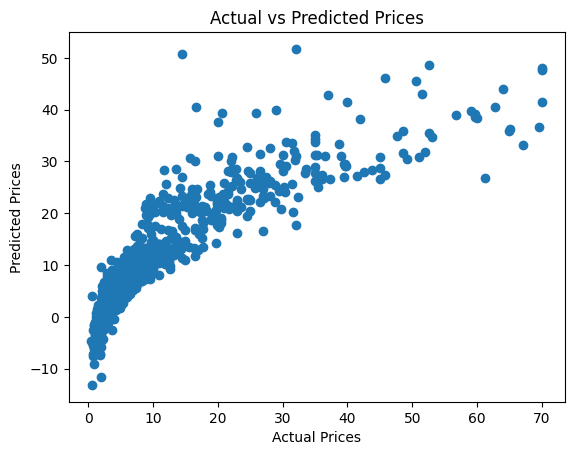

In [183]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

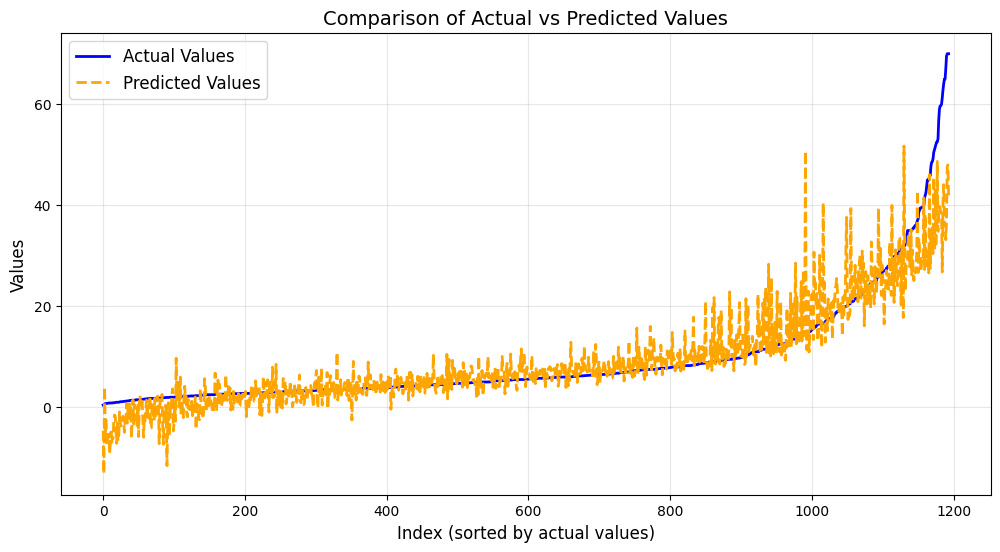

In [185]:
# Convert pandas Series to NumPy arrays
y_test_array = np.array(y_test)
y_pred_lr_array = np.array(y_pred_lr)

# Sorting the data for better visualization
sorted_indices = np.argsort(y_test_array)  # Sort by the actual values
y_test_sorted = y_test_array[sorted_indices]
y_pred_lr_sorted = y_pred_lr_array[sorted_indices]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_lr_sorted, label="Predicted Values", color="orange", linestyle="--", linewidth=2)

# Adding title and labels
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index (sorted by actual values)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


### 5.2- Polynomial Regression

In [188]:
# Applying Polynomial Linear Regression

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True) # include_bias=False- 
poly.fit(X_train_scaled)

X_train_poly= poly.transform(X_train_scaled)
X_test_poly= poly.transform(X_test_scaled)

# Initializing and training the model
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

# Making predictions
y_pred_poly_lr = poly_lr_model.predict(X_test_poly)
print("accuracy : ", r2_score(y_test, y_pred_poly_lr))

accuracy :  -2.7376439377077767e+20


### 5.3- Random Forest Regression

In [191]:
# Initializing and training the model
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = lr_model.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 26.633635725110917
Mean Absolute Error (MAE): 3.0017126693345344
R-squared (R2): 0.7827789241056045


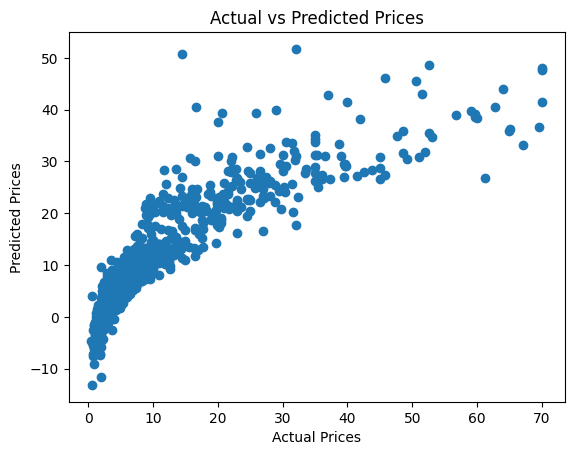

In [193]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

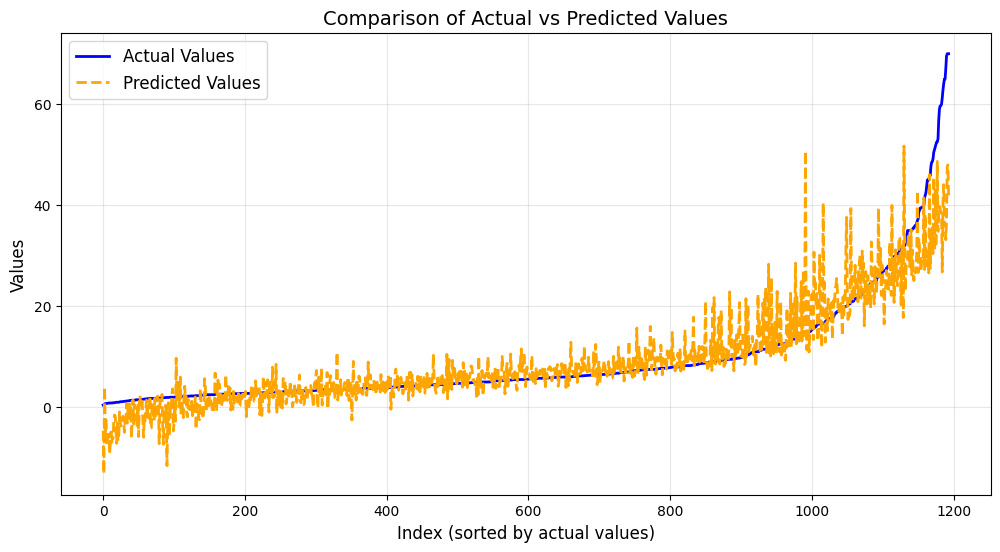

In [195]:
# Convert pandas Series to NumPy arrays
y_test_array = np.array(y_test)
y_pred_rf_array = np.array(y_pred_rf)

# Sorting the data for better visualization
sorted_indices = np.argsort(y_test_array)  # Sort by the actual values
y_test_sorted = y_test_array[sorted_indices]
y_pred_rf_sorted = y_pred_rf_array[sorted_indices]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_rf_sorted, label="Predicted Values", color="orange", linestyle="--", linewidth=2)

# Adding title and labels
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index (sorted by actual values)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


### 5.4- Decision Tree Regression

In [198]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_scaled, y_train)

y_pred_dt = regressor.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 17.819126905360132
Mean Absolute Error (MAE): 1.8531448911222779
R-squared (R2): 0.8546691124775088


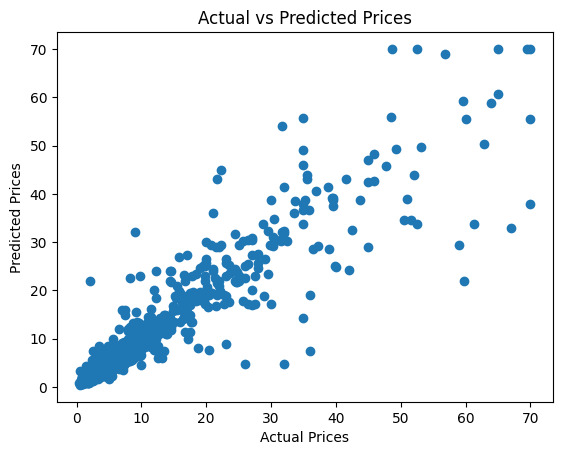

In [200]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

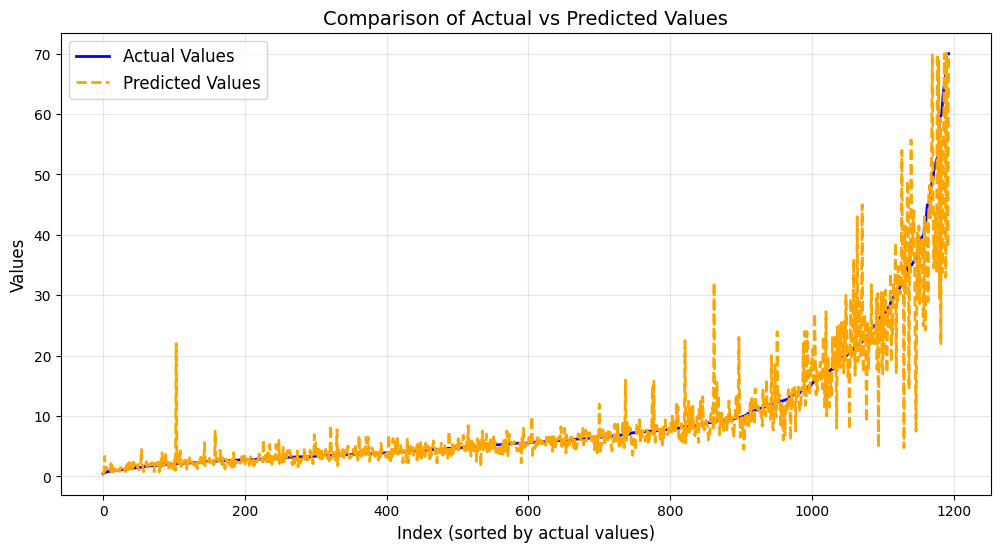

In [202]:
# Convert pandas Series to NumPy arrays
y_test_array = np.array(y_test)
y_pred_dt_array = np.array(y_pred_dt)

# Sorting the data for better visualization
sorted_indices = np.argsort(y_test_array)  # Sort by the actual values
y_test_sorted = y_test_array[sorted_indices]
y_pred_dt_sorted = y_pred_dt_array[sorted_indices]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_dt_sorted, label="Predicted Values", color="orange", linestyle="--", linewidth=2)

# Adding title and labels
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index (sorted by actual values)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


### 5.5- Support Vector Regression

In [205]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'linear')
svr_regressor.fit(X_train_scaled, y_train)

svr_regressor_pred = svr_regressor.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, svr_regressor_pred)
mae = mean_absolute_error(y_test, svr_regressor_pred)
r2 = r2_score(y_test, svr_regressor_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 34.258634852854
Mean Absolute Error (MAE): 2.776236026828048
R-squared (R2): 0.7205902491790128


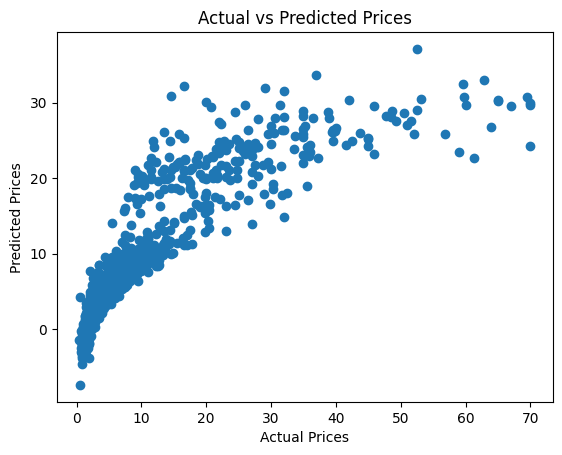

In [207]:
plt.scatter(y_test, svr_regressor_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

### 5.6- Gradient Boosting Regression

In [210]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 7, min_samples_split = 7,
          learning_rate = 0.1, loss = 'absolute_error')
gbr.fit(X_train_scaled, y_train)

y_pred_gbr=gbr.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 9.854102429560783
Mean Absolute Error (MAE): 1.3892050654529298
R-squared (R2): 0.9196309976671856


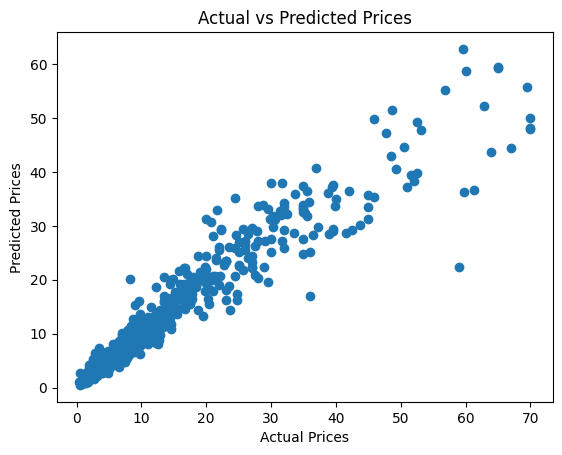

In [212]:
plt.scatter(y_test, y_pred_gbr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

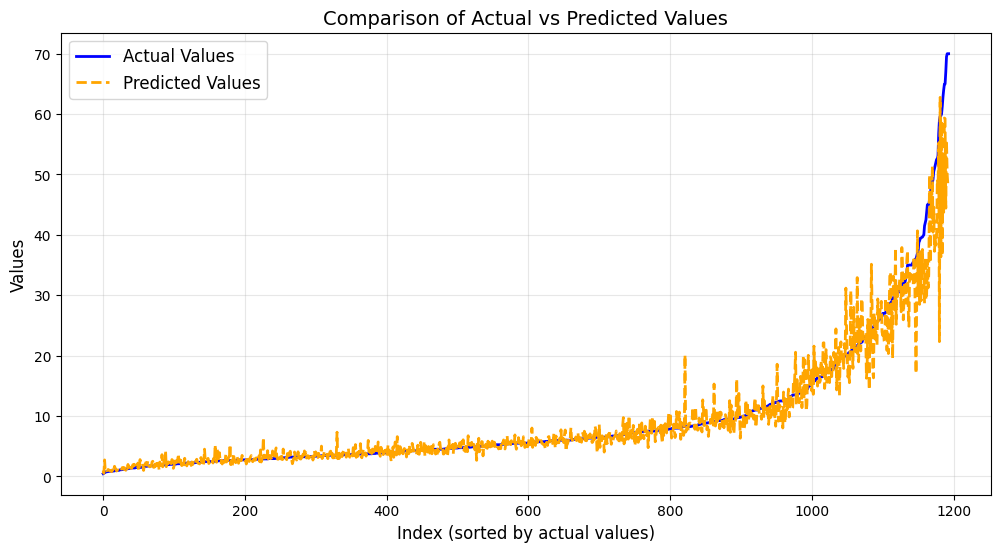

In [214]:
# Convert pandas Series to NumPy arrays
y_test_array = np.array(y_test)
y_pred_gbr_array = np.array(y_pred_gbr)

# Sorting the data for better visualization
sorted_indices = np.argsort(y_test_array)  # Sort by the actual values
y_test_sorted = y_test_array[sorted_indices]
y_pred_gbr_sorted = y_pred_gbr_array[sorted_indices]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_gbr_sorted, label="Predicted Values", color="orange", linestyle="--", linewidth=2)

# Adding title and labels
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index (sorted by actual values)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


### 5.7- XG Boost

In [217]:
from xgboost import XGBRegressor
# Initialization and training of XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 7,
          learning_rate = 0.3, loss = 'absolute_error', reg_lambda= 0.1)
xgb_model.fit(X_train_scaled, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 11.908875593136482
Mean Absolute Error (MAE): 1.4483024616966296
R-squared (R2): 0.9028724881674847


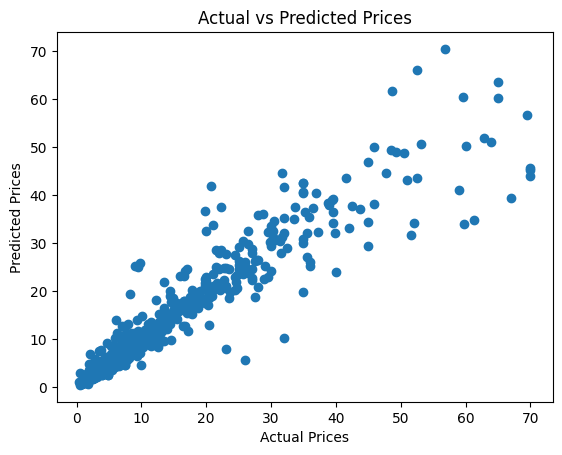

In [219]:
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

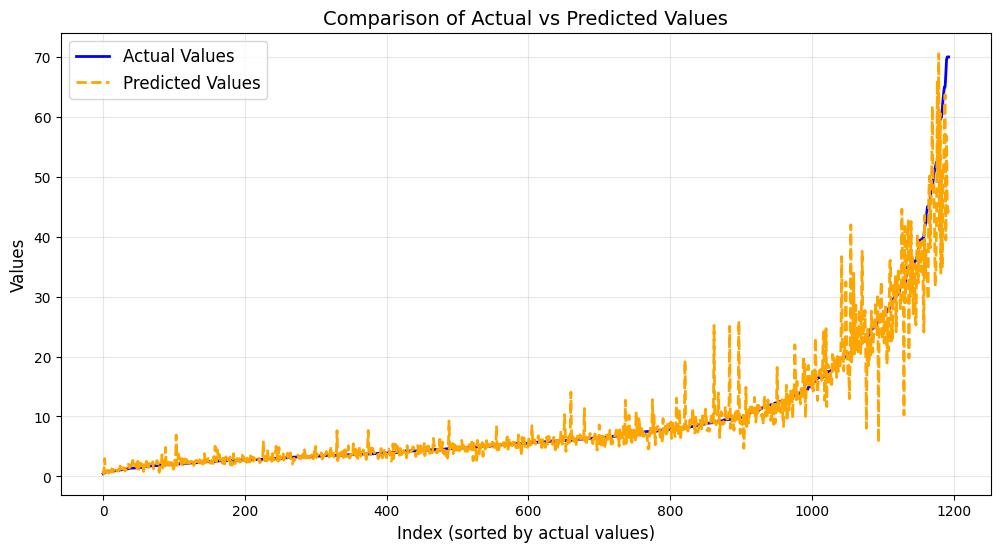

In [221]:
# Convert pandas Series to NumPy arrays
y_test_array = np.array(y_test)
y_pred_xgb_array = np.array(y_pred_xgb)

# Sorting the data for better visualization
sorted_indices = np.argsort(y_test_array)  # Sort by the actual values
y_test_sorted = y_test_array[sorted_indices]
y_pred_xgb_sorted = y_pred_xgb_array[sorted_indices]

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_xgb_sorted, label="Predicted Values", color="orange", linestyle="--", linewidth=2)

# Adding title and labels
plt.title("Comparison of Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index (sorted by actual values)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


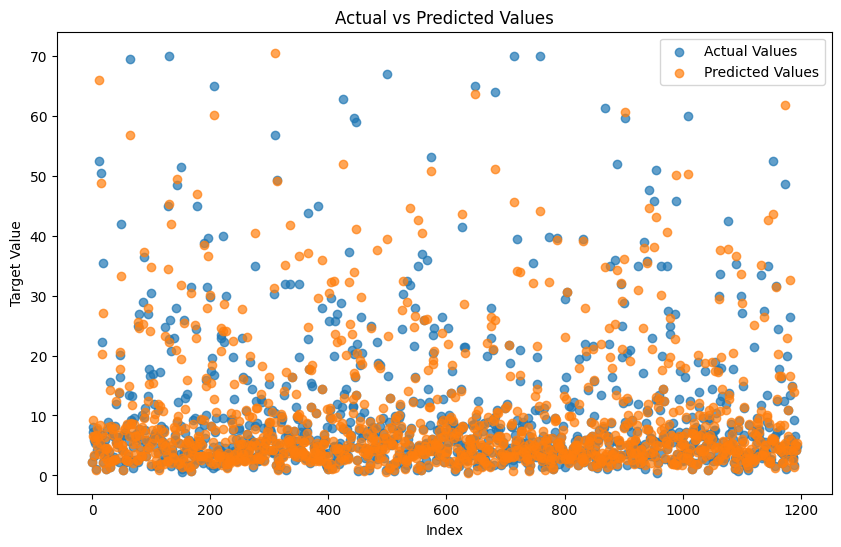

In [223]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_xgb, label="Predicted Values", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()


### 5.8- Deep Neural Network

In [274]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Building the Deep Neural Network
dnn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer + Hidden layer 1
    Dropout(0.3),                                                     # Dropout for regularization
    Dense(64, activation='relu'),                                     # Hidden layer 2
    Dropout(0.3),                                                     # Dropout for regularization
    Dense(32, activation='relu'),                                     # Hidden layer 3
    Dense(1, activation='linear')                                     # Output layer for regression
])

# Compiling the model
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Setting up Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor (validation loss)
    patience=5,          # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)


# Train the model
history = dnn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=200,            # Number of iterations over the dataset
    batch_size=32,         # Number of samples per gradient update
    callbacks=[early_stopping],
    verbose=1              # Print progress
)

# Evaluating the model on the test set
y_pred_dnn = dnn_model.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_dnn)
mae = mean_absolute_error(y_test, y_pred_dnn)
r2 = r2_score(y_test, y_pred_dnn)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Epoch 1/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 137.5374 - mae: 6.8798 - val_loss: 45.7223 - val_mae: 3.6287
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36.3146 - mae: 3.4725 - val_loss: 28.6104 - val_mae: 2.7218
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24.4034 - mae: 2.8832 - val_loss: 25.0794 - val_mae: 2.7476
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 22.8853 - mae: 2.6318 - val_loss: 19.7367 - val_mae: 2.1887
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.6985 - mae: 2.4299 - val_loss: 16.7948 - val_mae: 2.0054
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17.7822 - mae: 2.3164 - val_loss: 13.5882 - val_mae: 1.8581
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.0416 - mae: 2.0608 - val_loss: 14.5019 - val_mae: 1.9293
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.6108 - mae: 2.1041 - val_loss: 12.2696 - val_mae: 1.7657
Epoch 9/200
120/120 ━━━━━━━━━━━

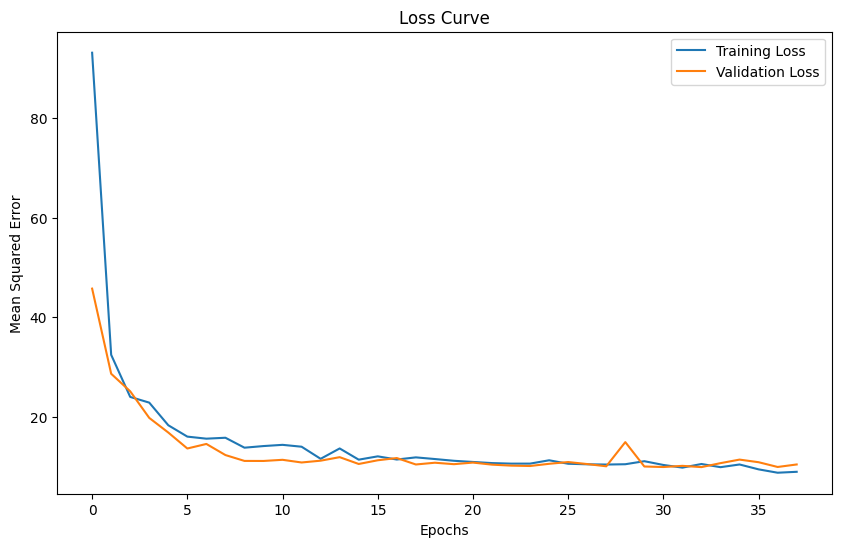

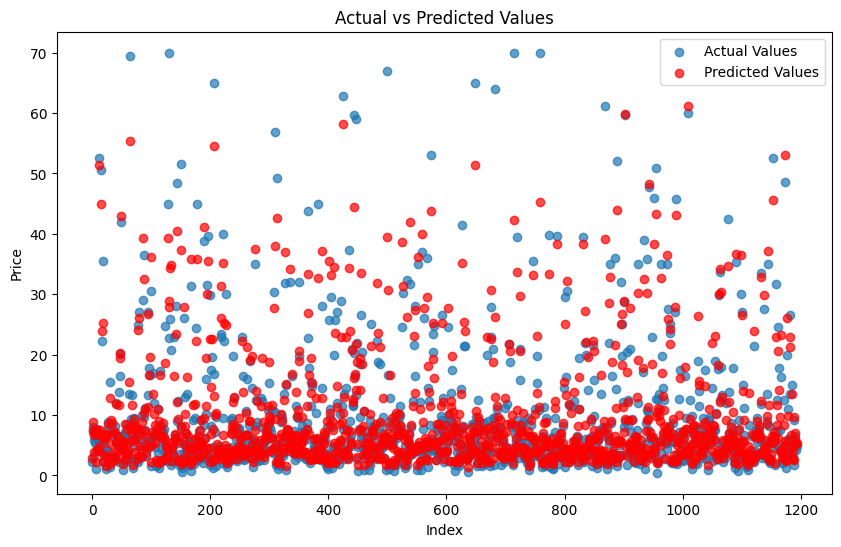

In [276]:
# Visualize the training history
import matplotlib.pyplot as plt

# Loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.7)
plt.scatter(range(len(y_test)), y_pred, label="Predicted Values", alpha=0.7, color='r')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()


## Observations from the above Fitted Models

#### 1- Good Fitting in Low and Moderate Range:
- In the lower and moderate value ranges, the predicted values closely match the actual values.
- This indicates the model is performing reasonably well for most of the data.
#### 2- Poor Fitting in the High-Value Range:
- The model struggles to predict the high values (outliers).
- It seems to underestimate or fail to capture the sharp increase, which might suggest a bias in the model or insufficient flexibility to capture the extreme values.
#### 3- High Variability
- There is noticeable noise in the predictions, even when the actual values are relatively smooth. This indicates overfitting or a need for better regularization.


# 6- Hyperparameter Tuning for Best Estimators

### 6.1- XGB Regressor

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
RMSE on Test Data: 2.8763122275889024
Mean Squared Error (MSE): 8.273172030577433
Mean Absolute Error (MAE): 1.2589066976528471
R-squared (R2): 0.9325248964095769


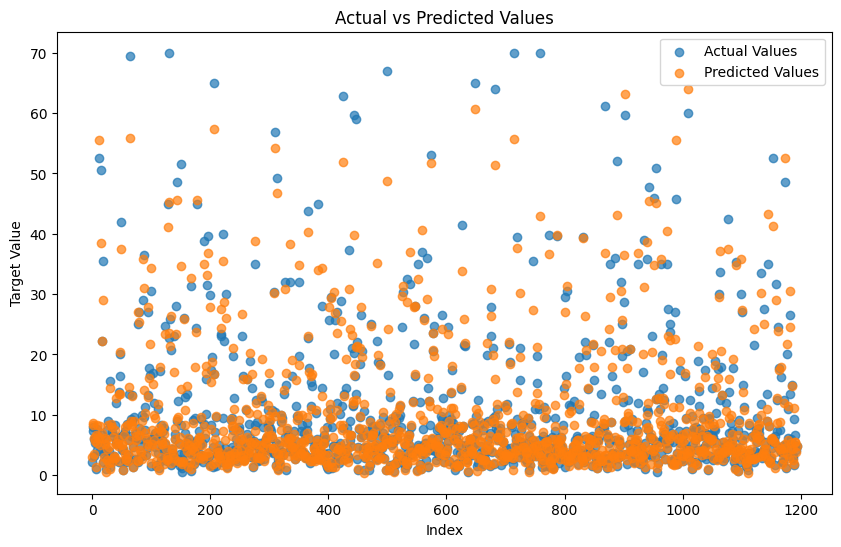

In [236]:

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],                # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.3],    # Step size (eta)
    'n_estimators': [100, 200, 300],      # Number of trees
    'subsample': [0.6, 0.8, 1.0],         # Fraction of samples for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features for each tree
    'gamma': [0, 1, 5],                   # Minimum loss reduction
    'reg_lambda': [0.1, 1, 10],           # L2 Regularization
    'reg_alpha': [0, 1, 5]                # L1 Regularization
}

# Setting up GridSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
     param_distributions=param_grid,
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=3,                             # Number of cross-validation folds
    verbose=1,                        # Print progress
    n_jobs=-1                         # Use all available cores
)

# Fit the GridSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params_xgb = random_search.best_params_
best_model_xgb = random_search.best_estimator_

print("Best Parameters:", best_params_xgb)

# Predict on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test_scaled)


# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_best_xgb)
mae = mean_absolute_error(y_test, y_pred_best_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2 = r2_score(y_test, y_pred_best_xgb)
print("RMSE on Test Data:", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Visualize actual vs predicted values (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_best_xgb, label="Predicted Values", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()


In [244]:
# Training the model with Best Hyperparameters from RandomisedSearchCV
best_model_xgb.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_best_xgb)
mae = mean_absolute_error(y_test, y_pred_best_xgb)
r2 = r2_score(y_test, y_pred_best_xgb)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2) 

Mean Squared Error (MSE): 8.273172030577433
Mean Absolute Error (MAE): 1.2589066976528471
R-squared (R2): 0.9325248964095769


### 6.2- SGD  Regressor

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 1000, 'learning_rate': 'adaptive', 'eta0': 0.1, 'alpha': 0.0001}
RMSE on Test Data: 5.2118508451086525
Mean Squared Error (MSE): 27.163389231659778
Mean Absolute Error (MAE): 2.9980427647557324
R-squared (R2): 0.778458311334631


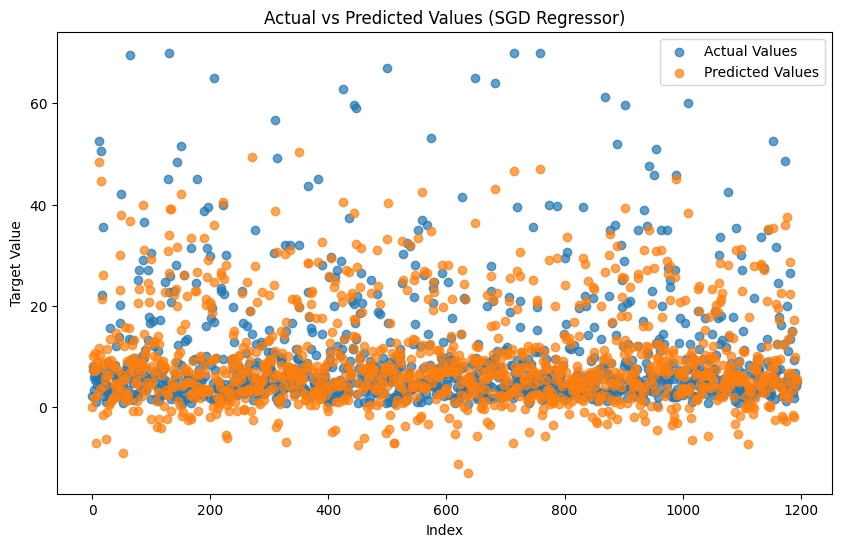

In [238]:
# Initializing the SGDRegressor
sgd = SGDRegressor(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],        # Regularization strength (L2 penalty)
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': [0.001, 0.01, 0.1, 1.0],            # Initial learning rate for 'constant' and 'adaptive'
    'max_iter': [1000, 2000, 3000],             # Maximum number of iterations
    'penalty': ['l2', 'l1', 'elasticnet'],      # Type of regularization
    'tol': [1e-3, 1e-4, 1e-5]                   # Stopping criteria tolerance
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_grid,  # Correct parameter name
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=3,                             # Number of cross-validation folds
    verbose=1,                        # Print progress
    n_jobs=-1,                        # Use all available cores
    n_iter=50,                        # Number of random combinations to try
    random_state=42                   # For reproducibility
)

# Fitting the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params_sgd = random_search.best_params_
best_model_sgd = random_search.best_estimator_

print("Best Parameters:", best_params_sgd)

# Predict on the test set
y_pred_best_sgd = best_model_sgd.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_best_sgd)
mae = mean_absolute_error(y_test, y_pred_best_sgd)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_sgd))
r2 = r2_score(y_test, y_pred_best_sgd)
print("RMSE on Test Data:", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Visualize actual vs predicted values (optional)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_best_sgd, label="Predicted Values", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values (SGD Regressor)")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()


### 6.3- Gradient Boosting Regressor

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1}
RMSE on Test Data: 2.994842632337961
Mean Squared Error (MSE): 8.969082392468966
Mean Absolute Error (MAE): 1.4399794308242804
R-squared (R2): 0.9268491261506329


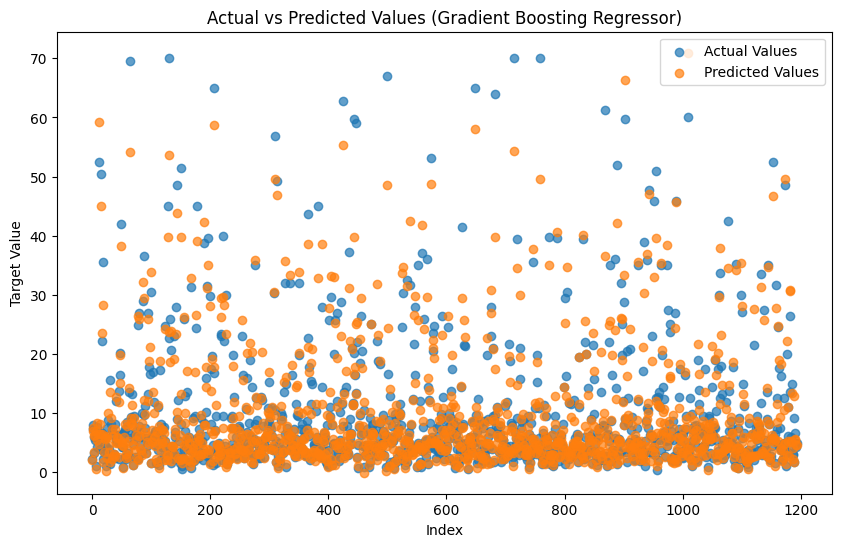

In [240]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],    # Step size (shrinkage factor)
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'subsample': [0.6, 0.8, 1.0],         # Fraction of samples for each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],        # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None], # Number of features to consider for the best split
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,  # Correct parameter name
    scoring='neg_mean_squared_error',  # Scoring metric
    cv=3,                             # Number of cross-validation folds
    verbose=1,                        # Print progress
    n_jobs=-1,                        # Use all available cores
    n_iter=50,                        # Number of random combinations to try
    random_state=42                   # For reproducibility
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params_gbr = random_search.best_params_
best_model_gbr = random_search.best_estimator_

print("Best Parameters:", best_params_gbr)

# Predict on the test set
y_pred_best_gbr = best_model_gbr.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_best_gbr)
mae = mean_absolute_error(y_test, y_pred_best_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_gbr))
r2 = r2_score(y_test, y_pred_best_gbr)
print("RMSE on Test Data:", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Visualize actual vs predicted values (optional)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_best_gbr, label="Predicted Values", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Values (Gradient Boosting Regressor)")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.show()


In [246]:
# Training the model with Best Hyperparameters from RandomisedSearchCV
best_model_gbr.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best_gbr = best_model_gbr.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_best_gbr)
mae = mean_absolute_error(y_test, y_pred_best_gbr)
r2 = r2_score(y_test, y_pred_best_gbr)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2) 

Mean Squared Error (MSE): 8.969082392468966
Mean Absolute Error (MAE): 1.4399794308242804
R-squared (R2): 0.9268491261506329


# 7- Comparision of Model Performence

In [280]:
# Defining the models and their corresponding R2 Score and Mae
model_performance = {
    "Model": [
        "Linear Regression", "Random Forest Regression",
        "Decision Tree Regression", "Support Vector Regression", "Gradient Boosting Regression",
        "XG Boost", "Deep Neural Network", "Optimized XGB Regressor", "Optimized Gradient Boosting Regressor","SGD Regressor"
    ],
    "R-squared (R2)": [
        0.7827789241056045, 0.7827789241056045, 0.8546691124775088, 0.7205902491790128, 0.9196309976671856, 0.9028724881674847,
        0.8949350732186201, 0.9325248964095769, 0.9268491261506329, 0.778458311334631
    ],
    "Mean Absolute Error (MAE)": [
        3.0017126693345344, 3.0017126693345344, 1.8531448911222779, 2.776236026828048, 1.3892050654529298, 1.4483024616966296,
        1.7164535180727643, 1.2589066976528471, 1.4399794308242804, 2.9980427647557324
    ],
    "Mean Squared Error (MSE)":[
        26.633635725110917, 26.633635725110917, 17.819126905360132, 34.258634852854, 9.854102429560783, 11.908875593136482, 12.882087872270414,
        8.273172030577433, 8.969082392468966, 27.163389231659778
    ]
}

# Convert the data into a pandas DataFrame for better handling
df2 = pd.DataFrame(model_performance)
df2

,Model,R-squared (R2),Mean Absolute Error (MAE),Mean Squared Error (MSE)
0,Linear Regression,0.782779,3.001713,26.633636
1,Random Forest Regression,0.782779,3.001713,26.633636
2,Decision Tree Regression,0.854669,1.853145,17.819127
3,Support Vector Regression,0.720590,2.776236,34.258635
4,Gradient Boosting Regression,0.919631,1.389205,9.854102
5,XG Boost,0.902872,1.448302,11.908876
6,Deep Neural Network,0.894935,1.716454,12.882088
7,Optimized XGB Regressor,0.932525,1.258907,8.273172
8,Optimized Gradient Boosting Regressor,0.926849,1.439979,8.969082
9,SGD Regressor,0.778458,2.998043,27.163389


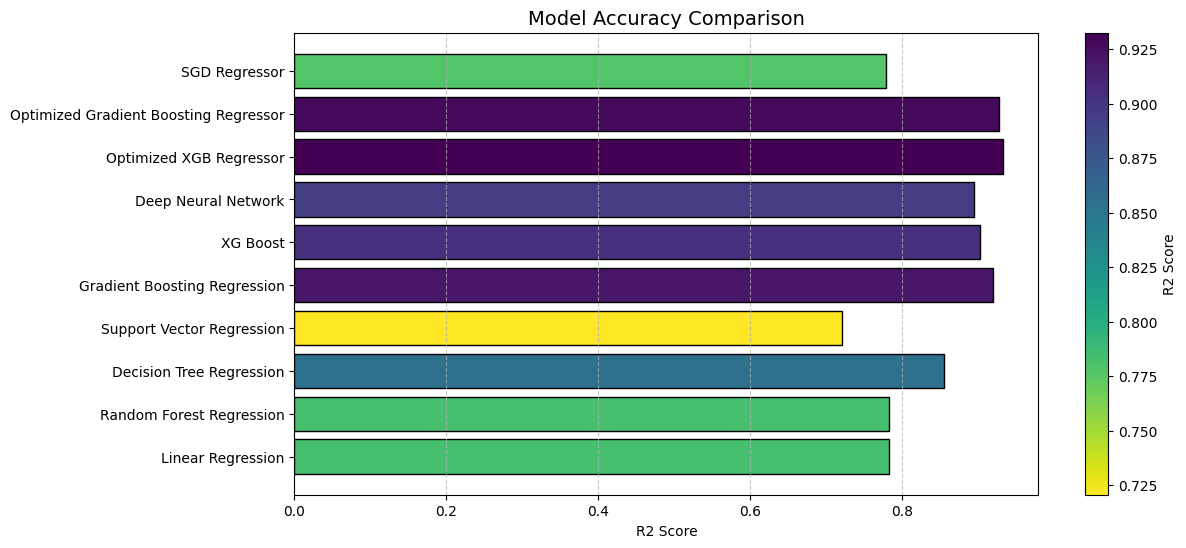

In [310]:
# Normalizing the R-squared values for the colormap
norm = plt.Normalize(df2['R-squared (R2)'].min(), df2['R-squared (R2)'].max())
colors = get_cmap('viridis_r')(norm(df2['R-squared (R2)']))  # Reverse the colormap for dark colors to highest values

plt.figure(figsize=(12, 6))
bars = plt.barh(df2['Model'], df2['R-squared (R2)'], color=colors, edgecolor='black')

plt.xlabel('R2 Score')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

fig = plt.gcf()  # Get the current figure
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('R2 Score')
plt.show()

## Top Performers:
- **Optimized Gradient Boosting Regressor and Optimized XGB Regressor** exhibit the highest R² scores, suggesting they are the most accurate models in this comparison.
- Deep Neural Network and XG Boost also have strong performances, ranking just below the top models.

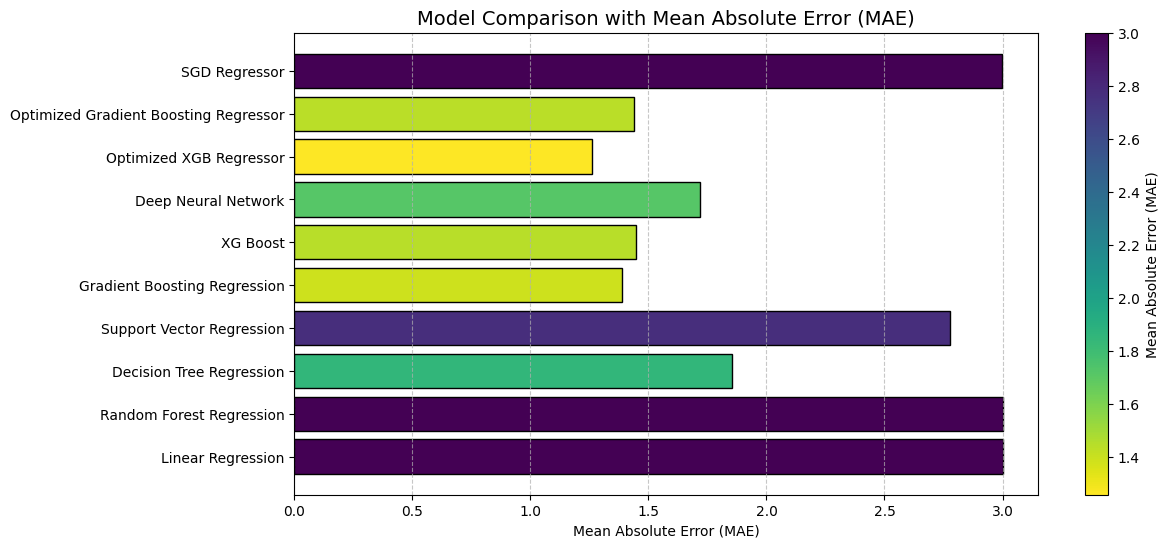

In [316]:
# Normalizing the R-squared values for the colormap
norm = plt.Normalize(df2['Mean Absolute Error (MAE)'].min(), df2['Mean Absolute Error (MAE)'].max())
colors = get_cmap('viridis_r')(norm(df2['Mean Absolute Error (MAE)']))  # Reverse the colormap for dark colors to highest values

plt.figure(figsize=(12, 6))
bars = plt.barh(df2['Model'], df2['Mean Absolute Error (MAE)'], color=colors, edgecolor='black')

plt.xlabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison with Mean Absolute Error (MAE)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

fig = plt.gcf()  # Get the current figure
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Mean Absolute Error (MAE)')
plt.show()

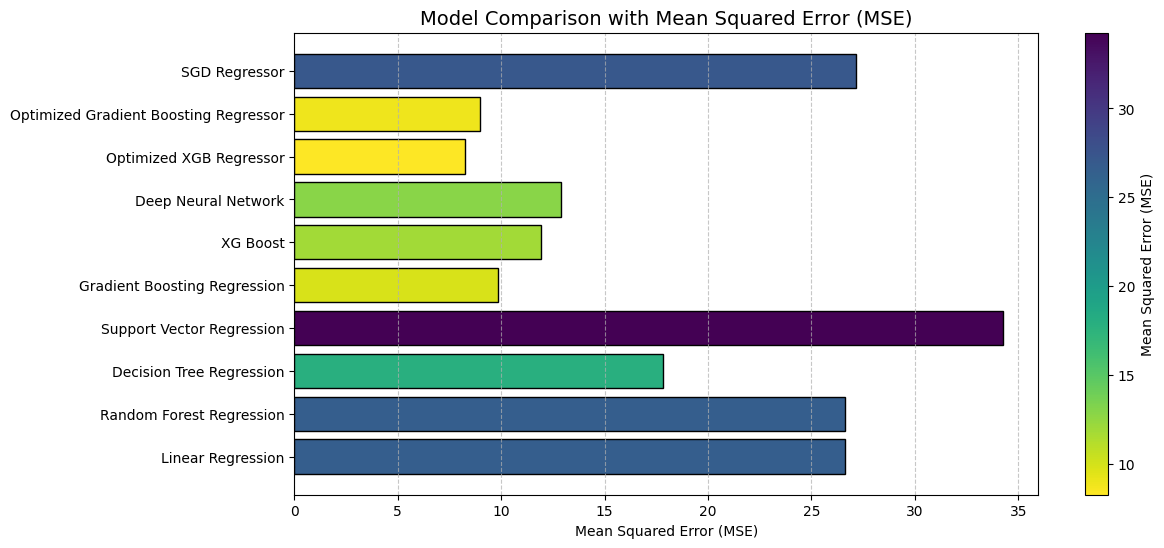

In [318]:
# Normalizing the R-squared values for the colormap
norm = plt.Normalize(df2['Mean Squared Error (MSE)'].min(), df2['Mean Squared Error (MSE)'].max())
colors = get_cmap('viridis_r')(norm(df2['Mean Squared Error (MSE)']))  # Reverse the colormap for dark colors to highest values

plt.figure(figsize=(12, 6))
bars = plt.barh(df2['Model'], df2['Mean Squared Error (MSE)'], color=colors, edgecolor='black')

plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Comparison with Mean Squared Error (MSE)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

fig = plt.gcf()  # Get the current figure
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Mean Squared Error (MSE)')
plt.show()

# 8- Feature importance according to the Best Fitted Models

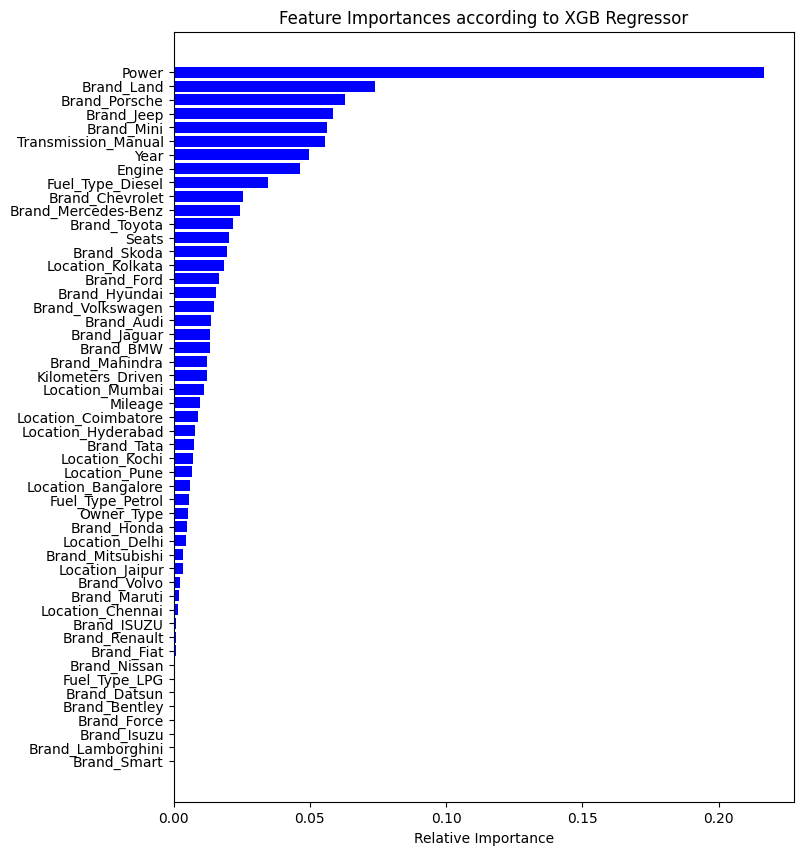

In [332]:
# Feature importance according to XGB Regressor
feature_names = list(df.columns)
feature_names.remove('Price')
importances = best_model_xgb.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(8, 10))
plt.title('Feature Importances according to XGB Regressor')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

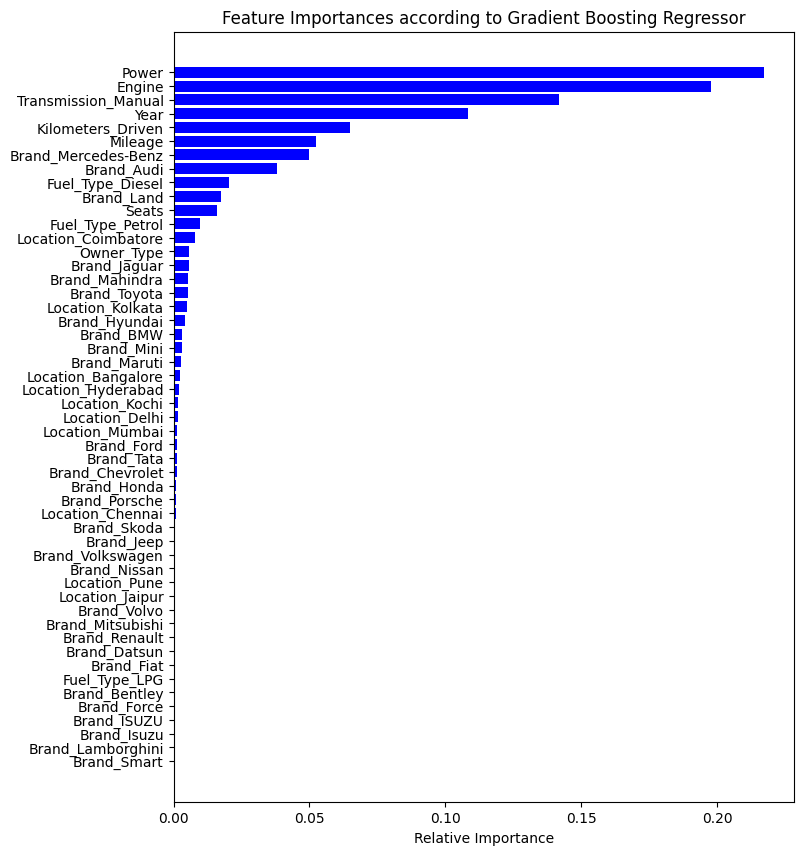

In [336]:
# Feature importance according to gradient boosting Regressor
feature_names = list(df.columns)
feature_names.remove('Price')
importances = best_model_gbr.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(8, 10))
plt.title('Feature Importances according to Gradient Boosting Regressor')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [342]:
from sklearn.inspection import permutation_importance

# Computing permutation importance
result = permutation_importance(dnn_model, X_test_scaled, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Extracting importance values
importances = result.importances_mean
indices = np.argsort(importances)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━

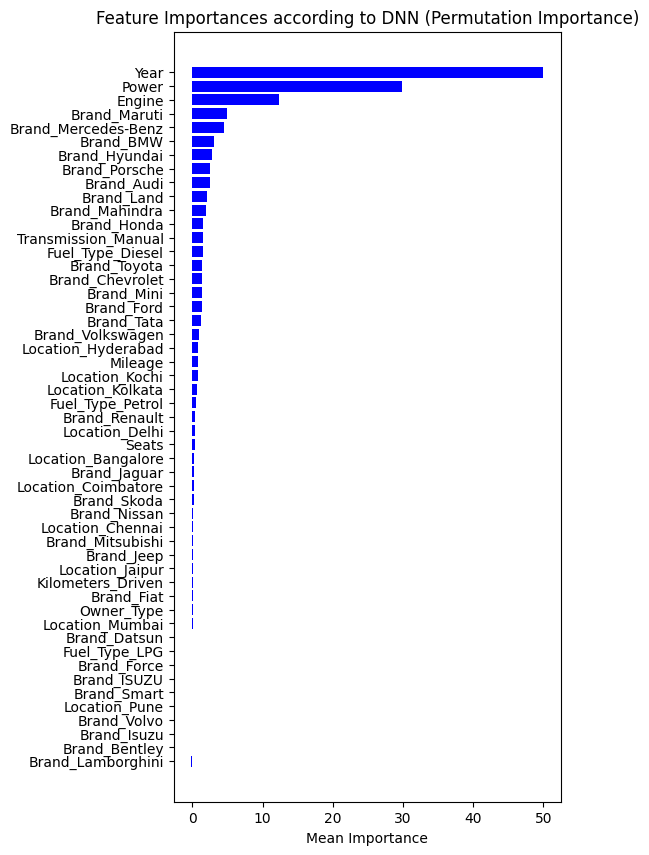

In [344]:
# Plotting feature importance
feature_names = list(df.columns)
feature_names.remove('Price')  # Excluding target column

plt.figure(figsize=(5,10))
plt.title('Feature Importances according to DNN (Permutation Importance)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Mean Importance')
plt.show()

- The permutation_importance function from sklearn.inspection is used to calculate the importance of each feature by shuffling its values and measuring how much the model's performance decreases.
## Key Observations:
### 1- Top Features:
- **Year:** This feature is the most important, indicating that the age of the car significantly affects its price.
- **Power:** The car's power (likely engine power in horsepower) is the second most impactful factor.
- **Engine:** The engine's specifications also strongly influence price predictions.
- **Brand (Maruti, Mercedes-Benz, BMW, etc.):** Certain car brands play a notable role in determining the price, with brands like Maruti and Mercedes-Benz being highly impactful.
### 2- Moderately Important Features:
- Features like **Transmission_Manual, Fuel Type (Diesel)**, and **specific brands** (e.g., Hyundai, Porsche) have moderate importance.
- These features highlight customer preferences and technical specifications affecting second-hand car pricing.

### 3- Less Important Features:
- Features such as Mileage, Seats, and less popular brands (e.g., Renault, Nissan) have minimal contributions.
- Location-specific features (e.g., Location_Kochi, Location_Kolkata) are less impactful.

## Insights:
- The chart provides a clear understanding of which features are most important for predicting second-hand car prices.
- The results could be used to refine the model further by focusing on high-importance features or improving data quality for less impactful ones.

# 9- Model Deployment

In [350]:
import joblib

# Saving the trained model
joblib.dump(best_model_xgb, 'XG_Boost_Regressor_model.pkl')
joblib.dump(best_model_gbr,'GradientBoosting_Regressor.pkl')
joblib.dump(dnn_model,'DNN_model_regression.pkl')

['DNN_model_regression.pkl']